# <font color ='blue'>Data Science Project: Predicting Home Prices in Bangalore</font>

##### Real Estate Price Prediction
##### Predicting price of a Real Estate Property on the basis of certain features
##### Data set we are using is Bengaluru's House data set
##### Will be Using Regression to solve the problem 

##### <font color ='blue'>Note</font>: Price is in lakhs 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline 
#stored within the notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade pip


In [3]:
#Bengaluru_House_Data -> Data set 
#Importing the data set
Data_frame = pd.read_csv("Bengaluru_House_Data.csv", na_values=[' ?'])
Data_frame.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
for i in Data_frame.columns:
    print(Data_frame[i].value_counts())
    print("\n")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64


location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64


size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK    

In [5]:
for i in Data_frame.columns:
    print(f'{i} \n {Data_frame[i].unique()}')
    print("\n")

area_type 
 ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


availability 
 ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


location 
 ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur e

In [6]:
Data_frame.shape

(13320, 9)

In [7]:
Data_frame.describe(include='all') 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


##### In predicting Price of a property, 'availability' and 'society' are not THAT important factor in comparison to other features

In [8]:
Data_frame_copy = Data_frame.copy()
Data_frame.drop(['availability', 'society'], axis=1, inplace=True)

## <font color ='blue'>Handeling Missing Values / Data cleaning</font>
##### Data is Missing in several columns as total rows/enteries are 13320 and in some features the count does not match

In [9]:
Data_frame.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

#### Prob1 -> Droping and Replacing Missing Values 
##### 1, 16, 73 are negligible amount in front of 13320 enteries so we can drop, in the case of balcony -> 609 we might wanna replace them with either mean or median depending on outliers

In [10]:
# Droping Missing Values 
Data_frame.dropna(subset = ['location', 'size', 'bath'], inplace=True)
Data_frame.shape

(13246, 7)

In [11]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       13246 non-null  float64
dtypes: float64(3), object(4)
memory usage: 827.9+ KB


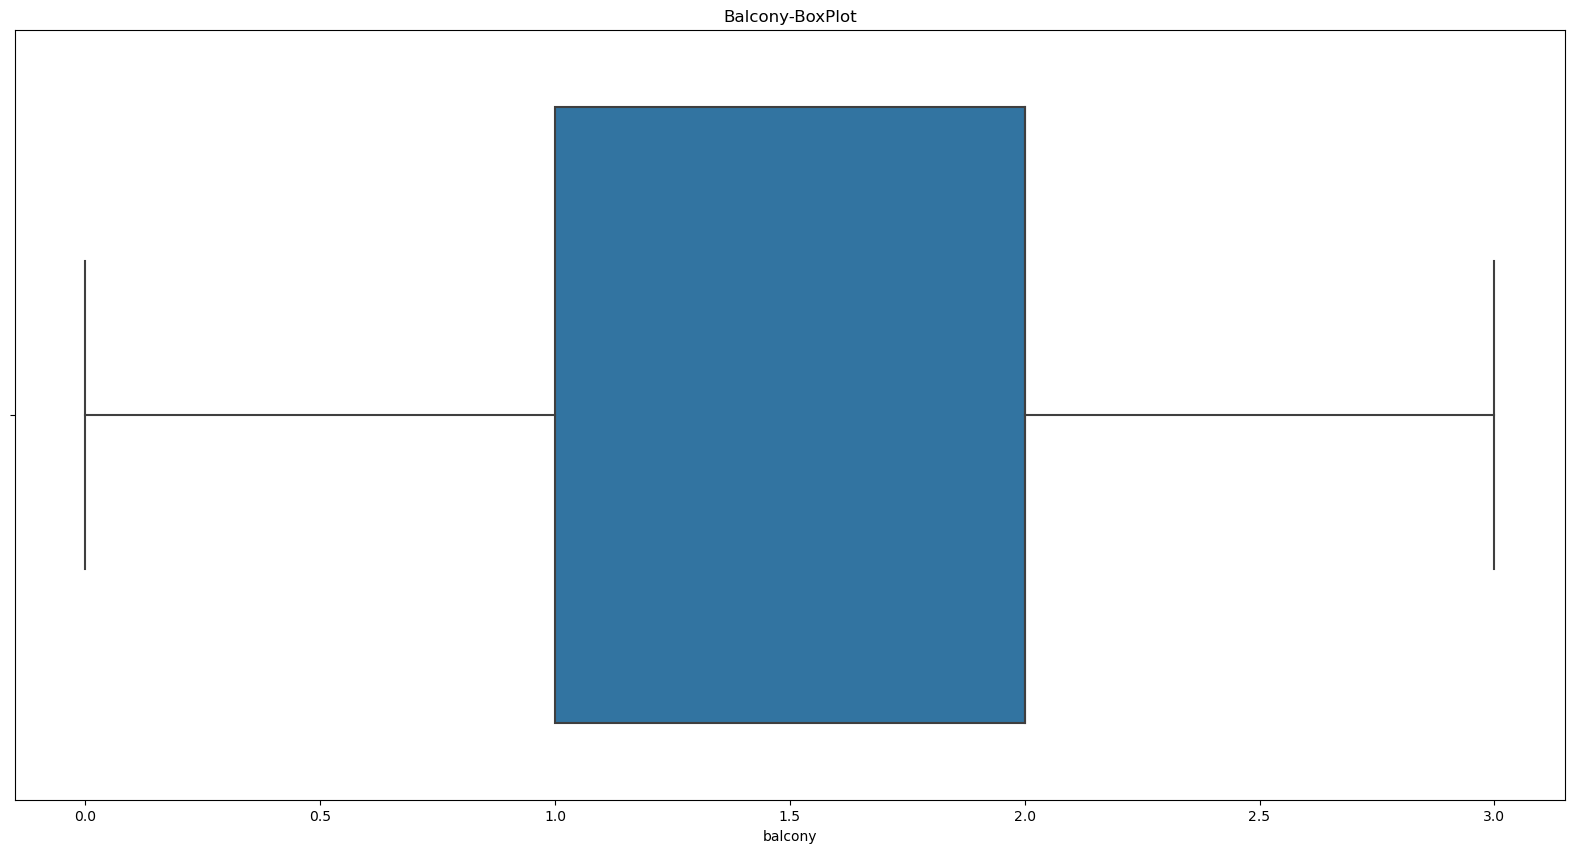

In [12]:
#Replacing Missing Values
sns.boxplot(x='balcony', data=Data_frame)
plt.title("Balcony-BoxPlot")
plt.show()
#Replacing the missing data with mean 
Data_frame['balcony'].replace(np.nan, Data_frame['balcony'].mean(), inplace=True)

In [13]:
Data_frame.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

#### Prob2 
##### In size feature, some enteries are in the form of 2 BHK and some are in 2 bedrooms , Both are same so we can solve this by taking only the numeric value from the size feature

In [14]:
Data_frame['BHK'] = Data_frame['size'].apply(lambda x: int(x.split(' ')[0]))
Data_frame.drop(['size'], axis=1, inplace=True)
Data_frame.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


#### Prob3 
##### total_sqft should be float or numeric but here it is object [ because of dim1-dim2 input ] [and inputs like 
##### sq Yards, Grounds, etc..]
##### The data is Not Structured
#### Solution  
##### so the best way would be to find an avg value of all dim1-dim2 input and replace it 
##### and convert the different types of meaurement to sqft
##### while doing so,  all the values going in the total_sqft feature will make the data type of that feature -> float 

In [15]:
print(f"{Data_frame['total_sqft'].value_counts()} \n\n {Data_frame['total_sqft'].unique()}")

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: count, Length: 2067, dtype: int64 

 ['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [16]:
# We can convert these values to float but values with ranges will give us error so we can create a filter type function

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

~Data_frame['total_sqft'].apply(is_float)
Temp_df = Data_frame[~Data_frame['total_sqft'].apply(is_float)]


In [17]:
def check_abnormal(x):
    if '-' in x:
        return False
    else:
        return True

Temp_df['total_sqft'][Temp_df['total_sqft'].apply(check_abnormal)].value_counts()

total_sqft
142.61Sq. Meter    2
34.46Sq. Meter     1
1Grounds           1
24Guntha           1
697Sq. Meter       1
1500Cents          1
132Sq. Yards       1
2Acres             1
1100Sq. Meter      1
15Acres            1
1.26Acres          1
151.11Sq. Yards    1
2940Sq. Yards      1
84.53Sq. Meter     1
45.06Sq. Meter     1
1.25Acres          1
86.72Sq. Meter     1
38Guntha           1
6Acres             1
120Sq. Yards       1
24Sq. Meter        1
142.84Sq. Meter    1
2.09Acres          1
122Sq. Yards       1
4125Perch          1
117Sq. Yards       1
1000Sq. Meter      1
1100Sq. Yards      1
5.31Acres          1
30Acres            1
716Sq. Meter       1
1500Sq. Meter      1
1574Sq. Yards      1
361.33Sq. Yards    1
3040Sq. Meter      1
78.03Sq. Meter     1
500Sq. Yards       1
167Sq. Meter       1
315Sq. Yards       1
3Cents             1
188.89Sq. Yards    1
204Sq. Meter       1
45Sq. Yards        1
133.3Sq. Yards     1
300Sq. Yards       1
Name: count, dtype: int64

In [18]:
len(Temp_df['total_sqft'][Temp_df['total_sqft'].apply(check_abnormal)].unique())

45

##### Sq.Meter, Perch, Sq.Yards, Acres, Cents, Guntha, Grounds.
##### 1 Sq.Meter = 10.76 sqft
##### 1 Perch = 272.25 sqft
##### 1 Sq.Yard = 9 sqft
##### 1 Acre = 43560.04 sqft
##### 1 Cent = 435.56 sqft
##### 1 Guntha = 1089 sqft
##### 1 Ground = 2400.35 sqft

In [19]:
#Creating Function to Convert ranges to a single Value 

def abnormal_change(x):
    if "Sq. Meter" in x:
        num = x.split("S")
        result = float(num[0]) * 10.76
        return result
    if "Perch" in x:
        num = x.split("P")
        result = float(num[0]) * 272.25
        return result
    if "Sq. Yards" in x:
        num = x.split("S")
        result = float(num[0]) * 9.00
        return result
    if "Acres" in x:
        num = x.split("A")
        result = float(num[0]) * 43560.04
        return result
    if "Cents" in x:
        num = x.split("C")
        result = float(num[0]) * 435.56
        return result
    if "Guntha" in x:
        num = x.split("G")
        result = float(num[0]) * 1089.00
        return result
    if "Grounds" in x:
        num = x.split("G")
        result = float(num[0]) * 2400.35
        return result

def convert_range_to_num(x):
    if '-' in x:
        num = x.split('-')
        result1 = (float(num[0]) + float(num[1]))/2
    else:
        bool_val = x.upper().isupper()
        if bool_val == True:
            result1 = abnormal_change(x)
        else:
            result1 = float(x)
    return result1

Data_frame['total_sqft'] = Data_frame['total_sqft'].apply(convert_range_to_num)

In [20]:
Data_frame.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [21]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   total_sqft  13246 non-null  float64
 3   bath        13246 non-null  float64
 4   balcony     13246 non-null  float64
 5   price       13246 non-null  float64
 6   BHK         13246 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [22]:
Data_frame.rename(columns = {'bath':'bathroom'}, inplace=True)
Data_frame.columns

Index(['area_type', 'location', 'total_sqft', 'bathroom', 'balcony', 'price',
       'BHK'],
      dtype='object')

In [23]:
# Adding a Column / Feature which is important for future use [outlier treatment ] + gives a proper insight of a property
Data_frame['price_per_sqft'] = Data_frame['price']*100000 / Data_frame['total_sqft']
Data_frame.head()

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


#### Now we have 2 Categorical values , They are required in encoding
##### Label encoding causes error in order of Data - which we cannot solve [as it depends on natural order of alphabets]
##### One-hot encoding can cause error in dimensions [increasing dimensions, known as dimensionality curse ]
##### we can decrease them by replacing those enteries which have low count 
##### [as they will not be that significant in prediction] as others [Putting them in a general category]

##### area_type will not cause any problems
##### Have to check for location 

In [24]:
count_location = len(Data_frame['location'].unique())
print(count_location)
pd.set_option('display.max_rows', count_location)
Location_data = Data_frame.groupby('location')['location'].agg('count').sort_values(ascending=False)
Location_data.head(200)

1304


location
Whitefield                     534
Sarjapur  Road                 392
Electronic City                302
Kanakpura Road                 266
Thanisandra                    233
Yelahanka                      210
Uttarahalli                    186
Hebbal                         176
Marathahalli                   175
Raja Rajeshwari Nagar          171
Bannerghatta Road              152
Hennur Road                    150
7th Phase JP Nagar             149
Haralur Road                   141
Electronic City Phase II       131
Rajaji Nagar                   106
Chandapura                      98
Bellandur                       96
KR Puram                        88
Hoodi                           88
Electronics City Phase 1        87
Yeshwanthpur                    85
Begur Road                      84
Sarjapur                        81
Kasavanhalli                    79
Harlur                          79
Banashankari                    74
Hormavu                         74
Ramamurthy 

In [25]:
filt = Location_data <= 15
len(Location_data[filt])

1124

In [26]:
Location_data_less_than_15 = Location_data[filt]
Location_data_less_than_15.head()

location
Varthur Road     15
Chamrajpet       15
Nagavarapalya    15
Kodihalli        15
Benson Town      15
Name: location, dtype: int64

In [27]:
Location_data_less_than_15.tail()

location
 Banaswadi             1
Kanakadasa Layout      1
Kanakapur main road    1
Kanakapura  Rod        1
whitefiled             1
Name: location, dtype: int64

In [28]:
Data_frame['location'] = Data_frame['location'].apply(lambda x: 'Other' if x in Location_data_less_than_15 else x)
print(count_location)
count_location_dimen_red = len(Data_frame['location'].unique())
print(count_location_dimen_red)
Data_frame.head(10)

1304
181


,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,1.584343,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,1.584343,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.000000,63.25,3,4828.244275
9,Plot Area,Other,1020.0,6.0,1.584343,370.00,6,36274.509804


# <font color ='blue'>Outlier Detection and Removal</font> 

##### Outliers are those data points those are way off from our main data set [ abnormal data points ]
##### Now they can be of
##### Type1->  Data points / numerical 
##### Type2 -> Domain error [ abnormality in the Domain Knowledge ] 
##### Type1 and Type2 are similar, Not that Different

In [29]:
Data_frame_numeric = Data_frame.select_dtypes(include=np.number)
Data_frame_numeric.head(10)

,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,1056.0,2.0,1.000000,39.07,2,3699.810606
1,2600.0,5.0,3.000000,120.00,4,4615.384615
2,1440.0,2.0,3.000000,62.00,3,4305.555556
3,1521.0,3.0,1.000000,95.00,3,6245.890861
4,1200.0,2.0,1.000000,51.00,2,4250.000000
5,1170.0,2.0,1.000000,38.00,2,3247.863248
6,2732.0,4.0,1.584343,204.00,4,7467.057101
7,3300.0,4.0,1.584343,600.00,4,18181.818182
8,1310.0,3.0,1.000000,63.25,3,4828.244275
9,1020.0,6.0,1.584343,370.00,6,36274.509804


In [30]:
Data_frame.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,1.584343,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,1.584343,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.000000,63.25,3,4828.244275
9,Plot Area,Other,1020.0,6.0,1.584343,370.00,6,36274.509804


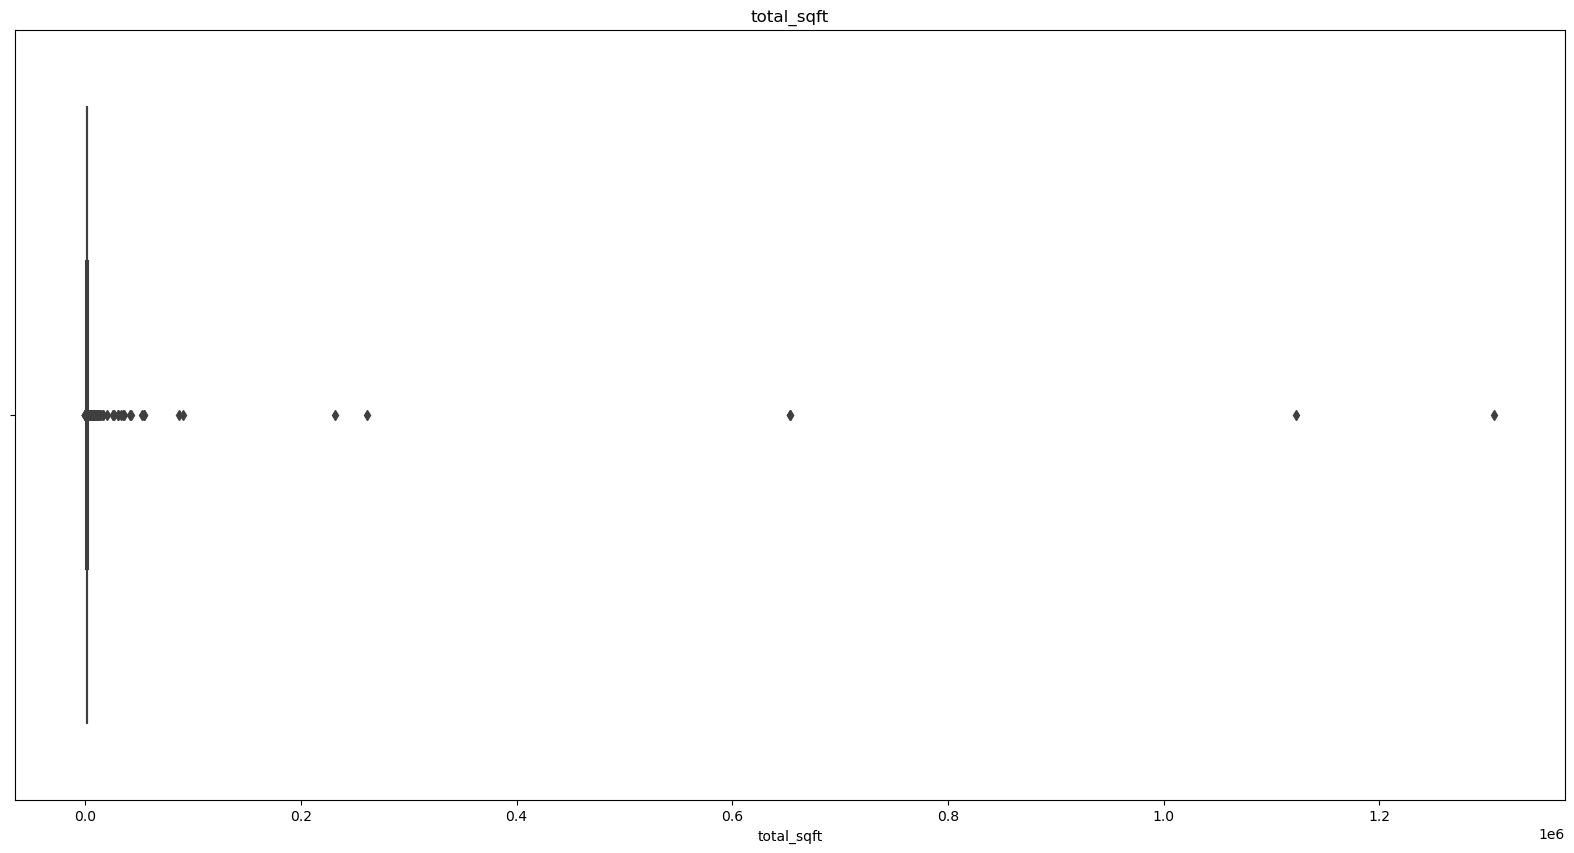

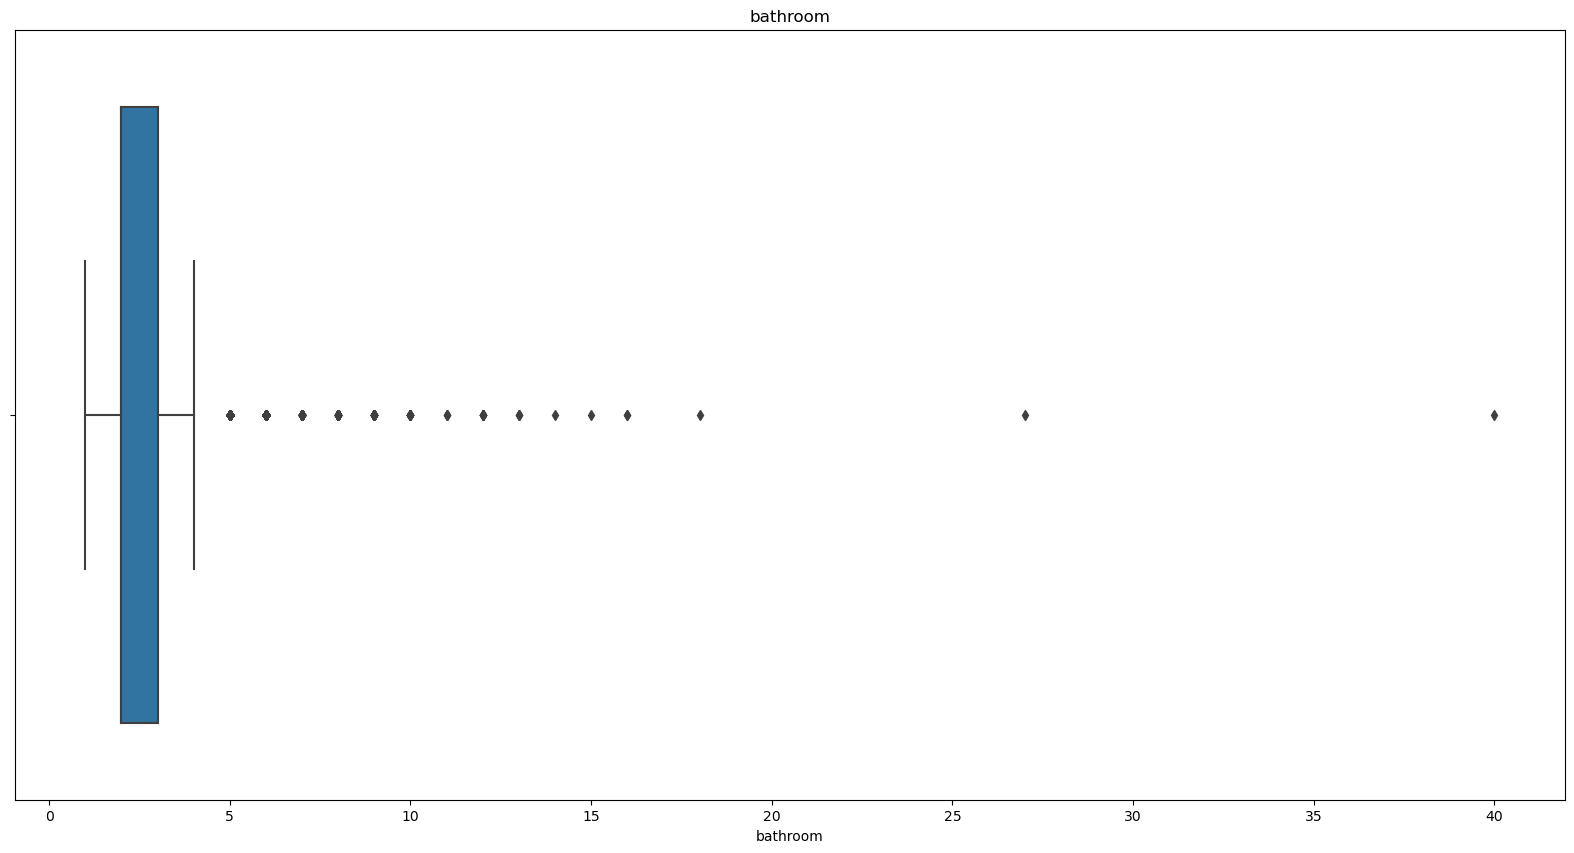

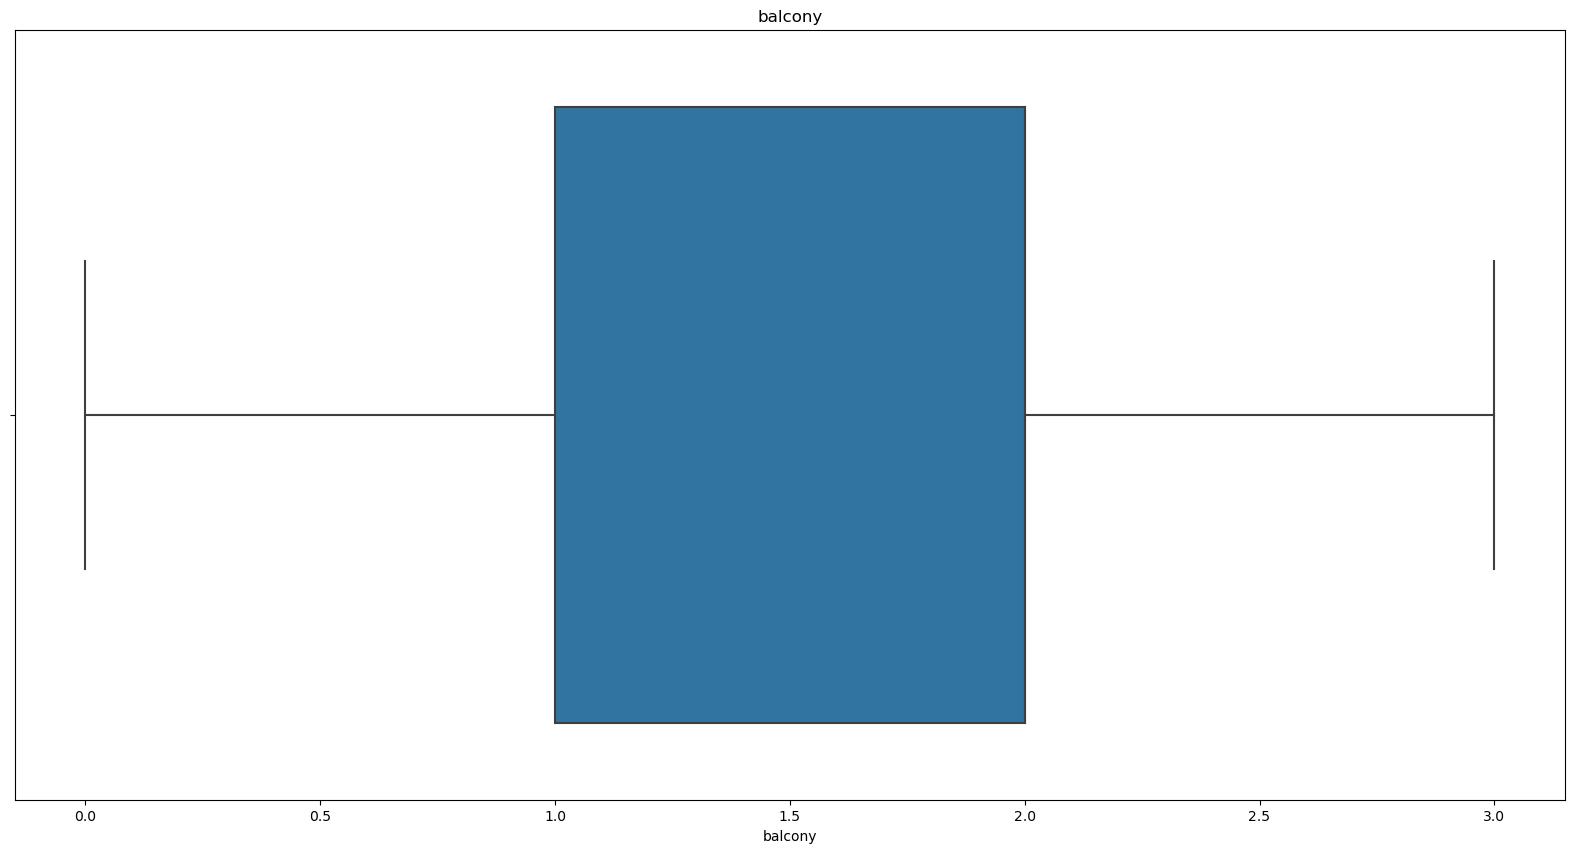

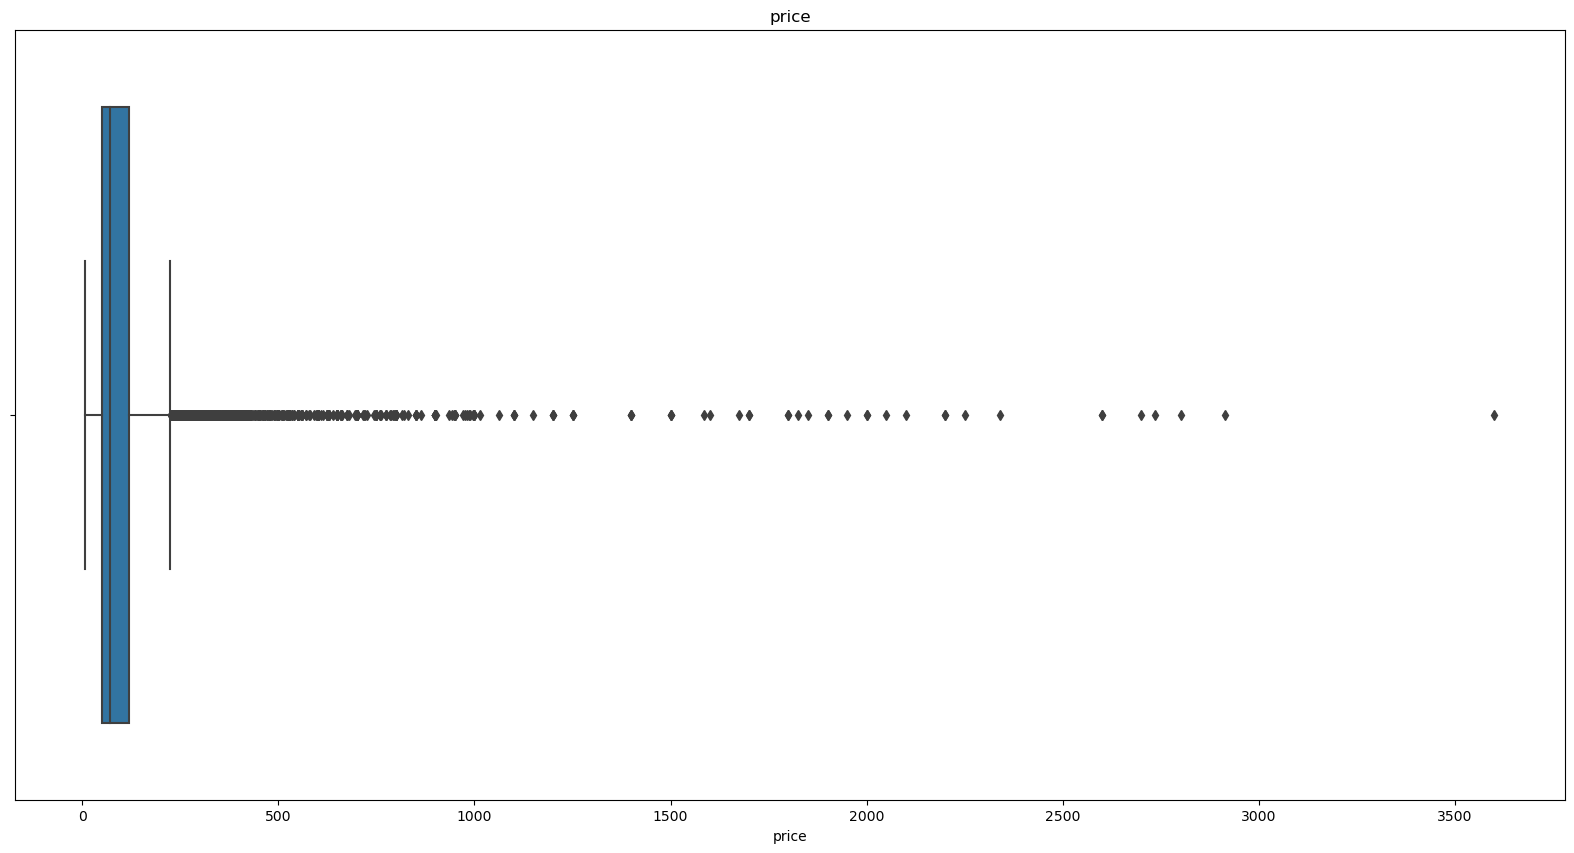

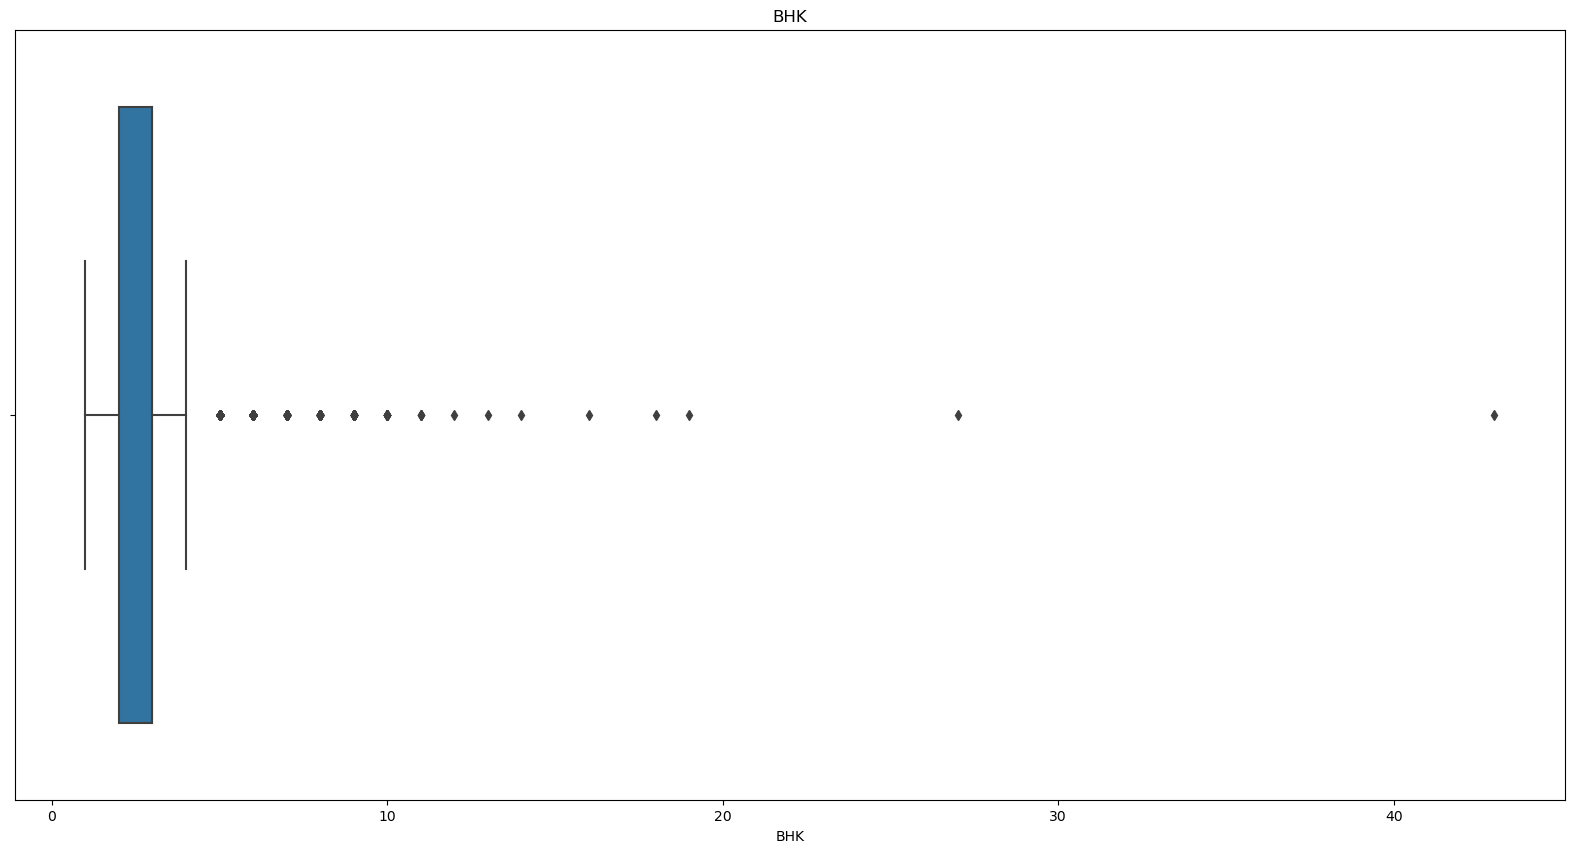

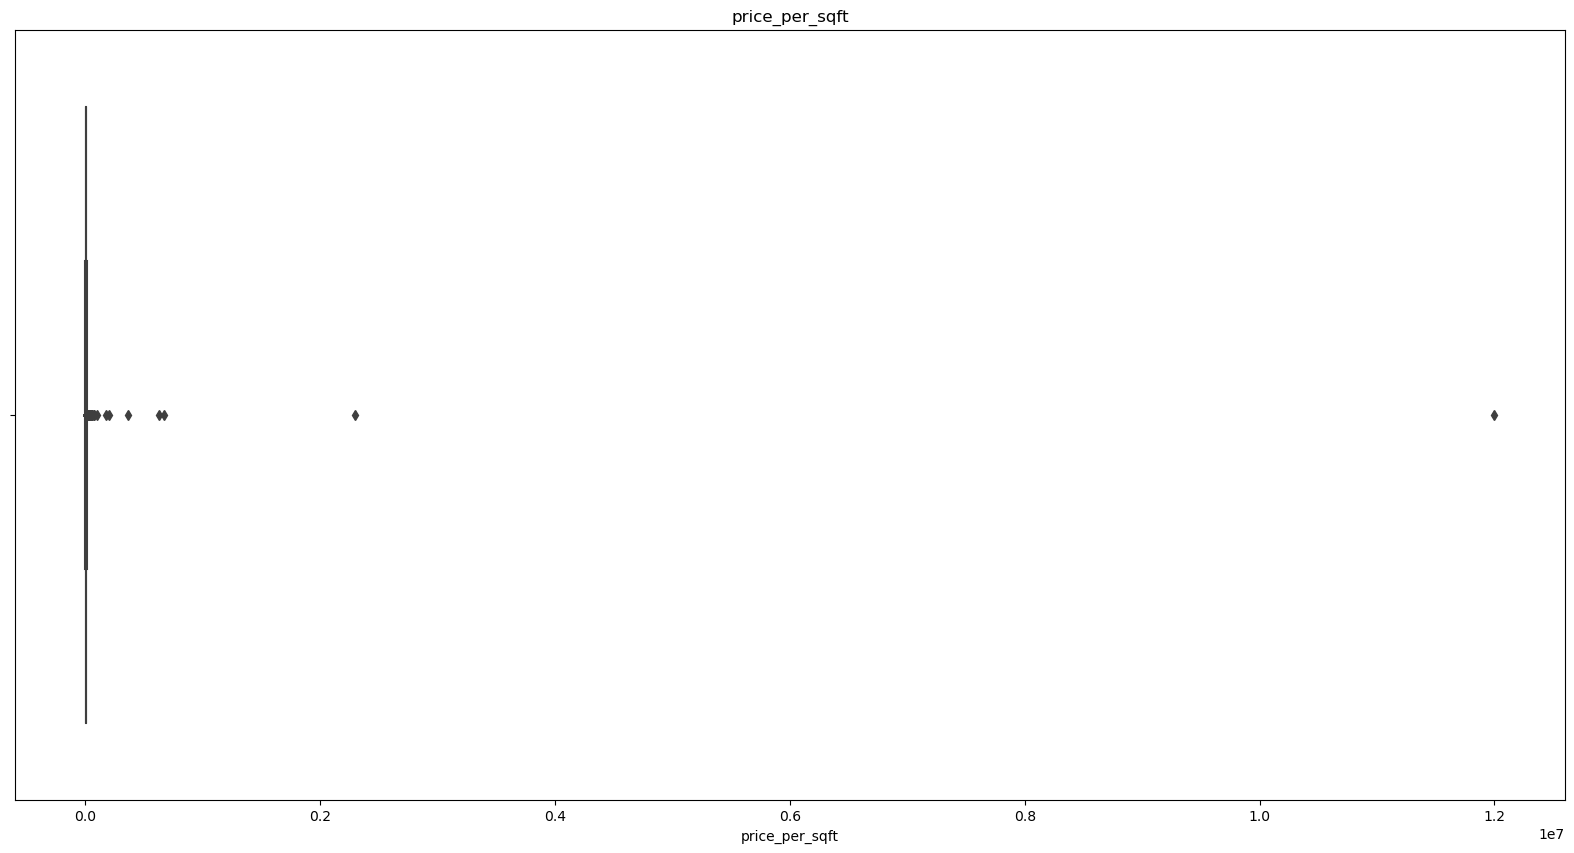

In [31]:
for i in Data_frame_numeric.columns:
    sns.boxplot(x=i, data=Data_frame_numeric)
    plt.title(i)
    plt.show()

#### Fixing Type 1 and Type 2 Outliers 

##### Problem in total_sqft, bathroom, price, BHK and price_per_sqft

#### total_sqft 

In [32]:
Data_frame['total_sqft'].describe()

count    1.324600e+04
mean     1.909248e+03
std      1.732468e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.275000e+03
75%      1.678750e+03
max      1.306801e+06
Name: total_sqft, dtype: float64

##### Max total_sqft is really high, not in general range, Which again tells us about the presence of outliers 

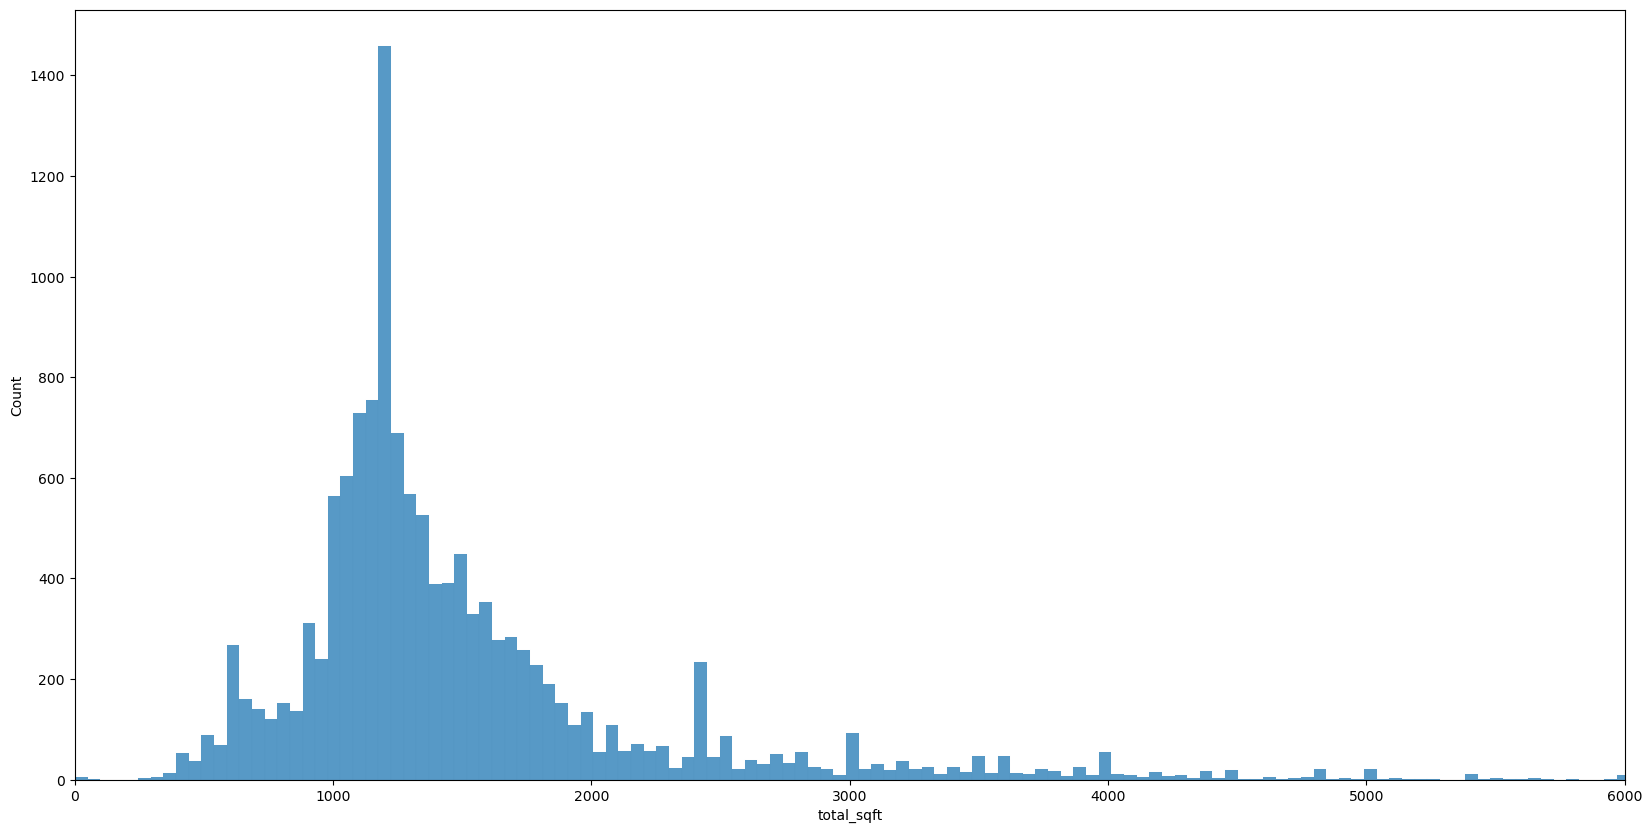

In [33]:
# total_sqft -> Treating outliers using Flooring and Capping
sns.histplot(x='total_sqft', data=Data_frame)
plt.xlim([0, 6000])
plt.show()

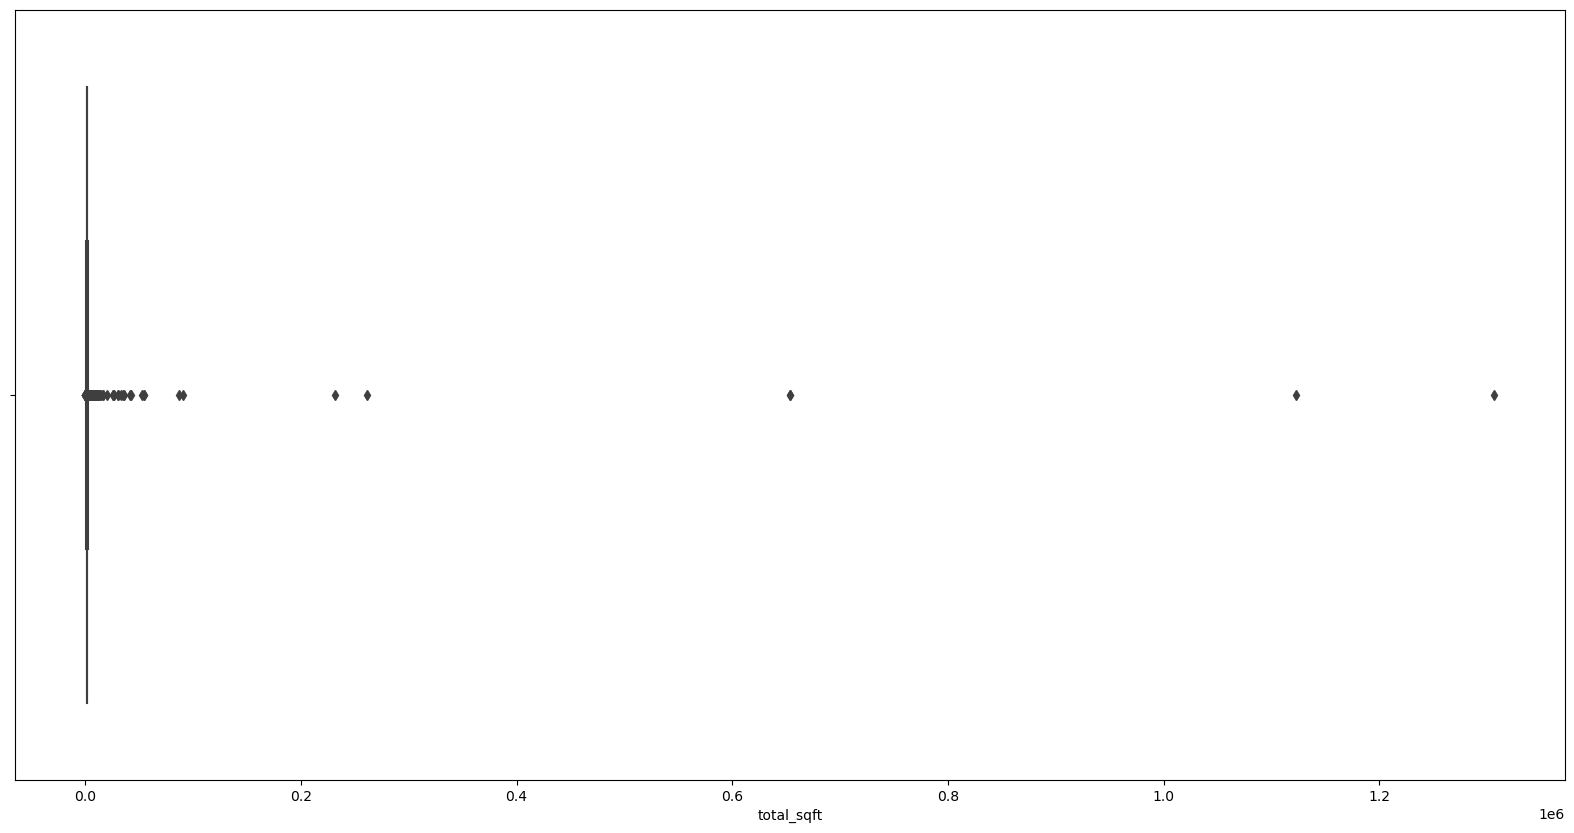

In [34]:
sns.boxplot(x='total_sqft', data=Data_frame)
plt.show()

In [35]:
# Applying Quantile Based Flooring and capping
lower_bound = Data_frame['total_sqft'].quantile(0.10)
upper_bound = Data_frame['total_sqft'].quantile(0.90)
Data_frame['total_sqft'] = np.where(Data_frame['total_sqft'] < lower_bound, lower_bound, Data_frame['total_sqft'])
Data_frame['total_sqft'] = np.where(Data_frame['total_sqft'] > upper_bound, upper_bound, Data_frame['total_sqft'])

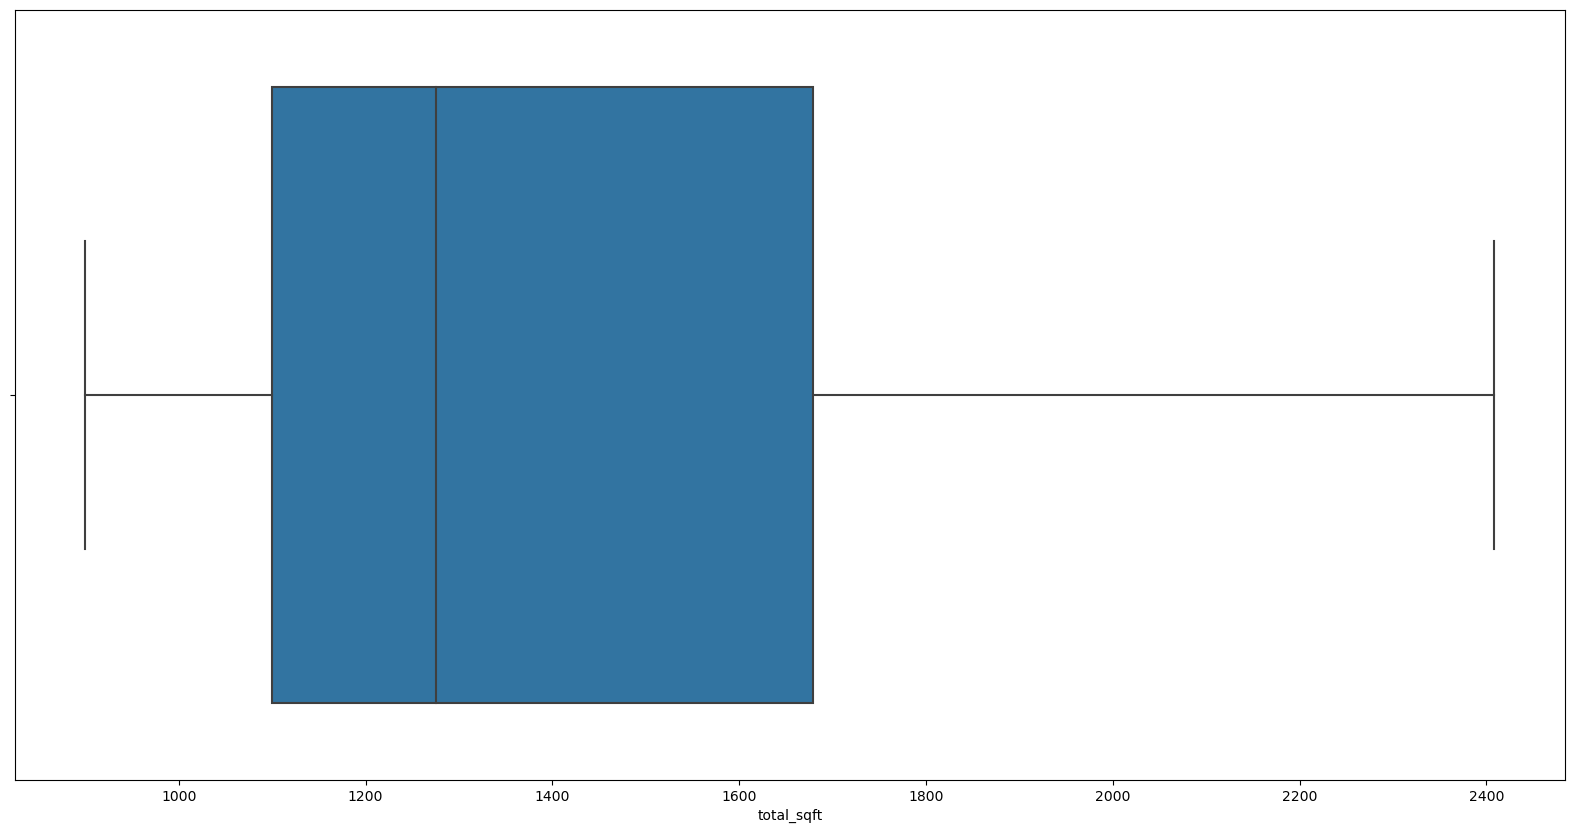

In [36]:
sns.boxplot(x='total_sqft', data=Data_frame)
plt.show()

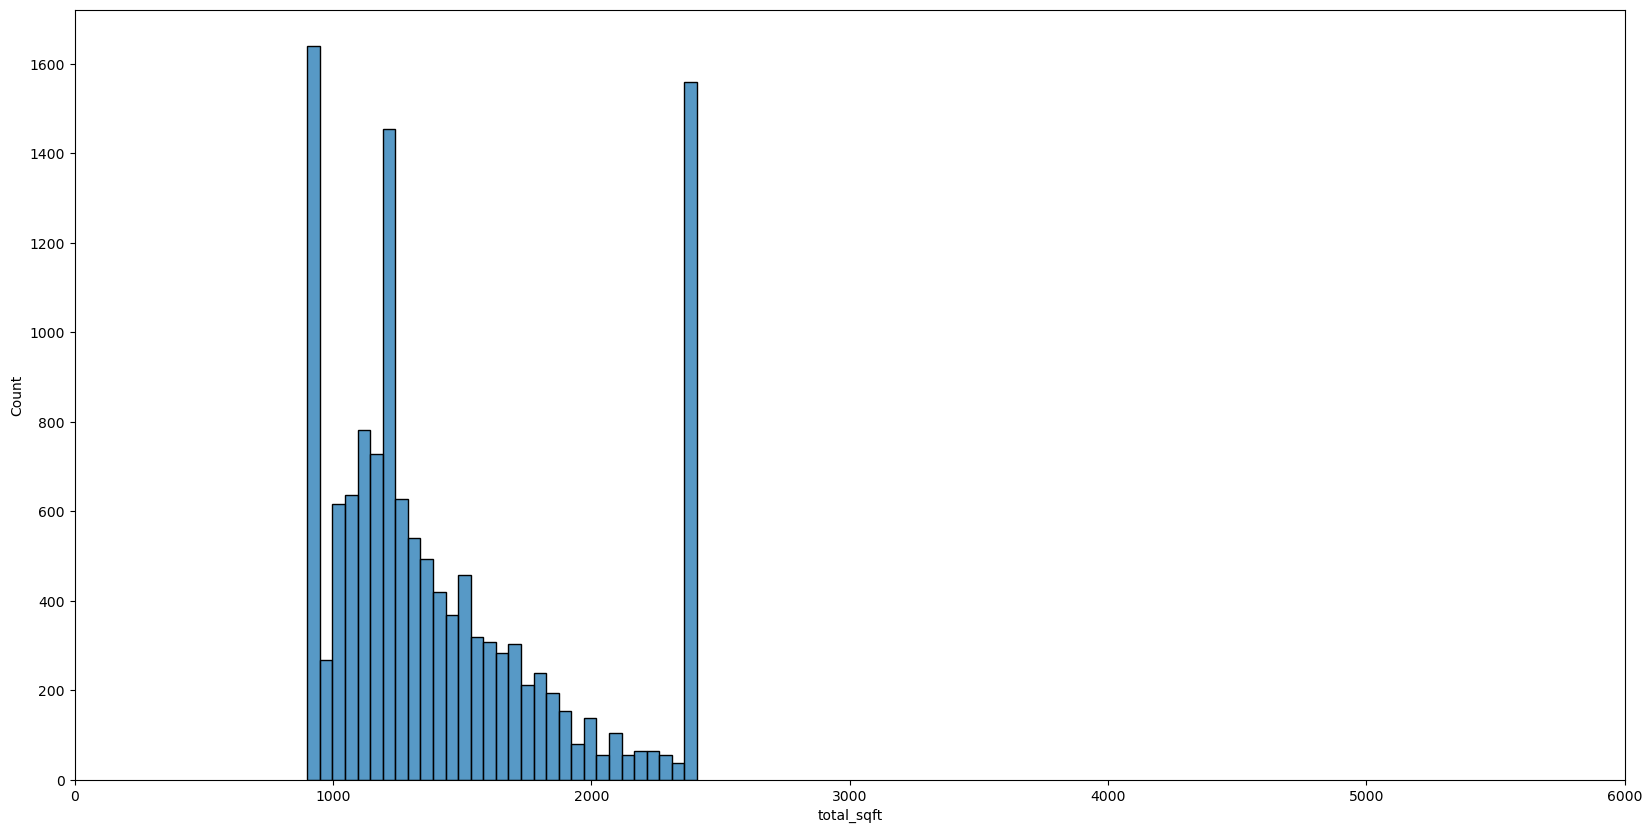

In [37]:
sns.histplot(x='total_sqft', data=Data_frame)
plt.xlim([0, 6000])
plt.show()

In [38]:
Data_frame['total_sqft'].describe()

count    13246.000000
mean      1438.315056
std        467.922813
min        900.000000
25%       1100.000000
50%       1275.000000
75%       1678.750000
max       2408.500000
Name: total_sqft, dtype: float64

#### bathroom

In [39]:
Data_frame['bathroom'].describe()

count    13246.000000
mean         2.692586
std          1.341506
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bathroom, dtype: float64

##### 40 bathrooms seems a lot for any general case, again it tells us about the presence of outliers 

In [40]:
# Bathroom - small quanitites of Outliers so Replace them with median 
median = Data_frame['bathroom'].quantile(0.50)
upper_out = Data_frame['bathroom'].quantile(0.95)
Data_frame['bathroom'] = np.where(Data_frame['bathroom'] > upper_out, median, Data_frame['bathroom'])

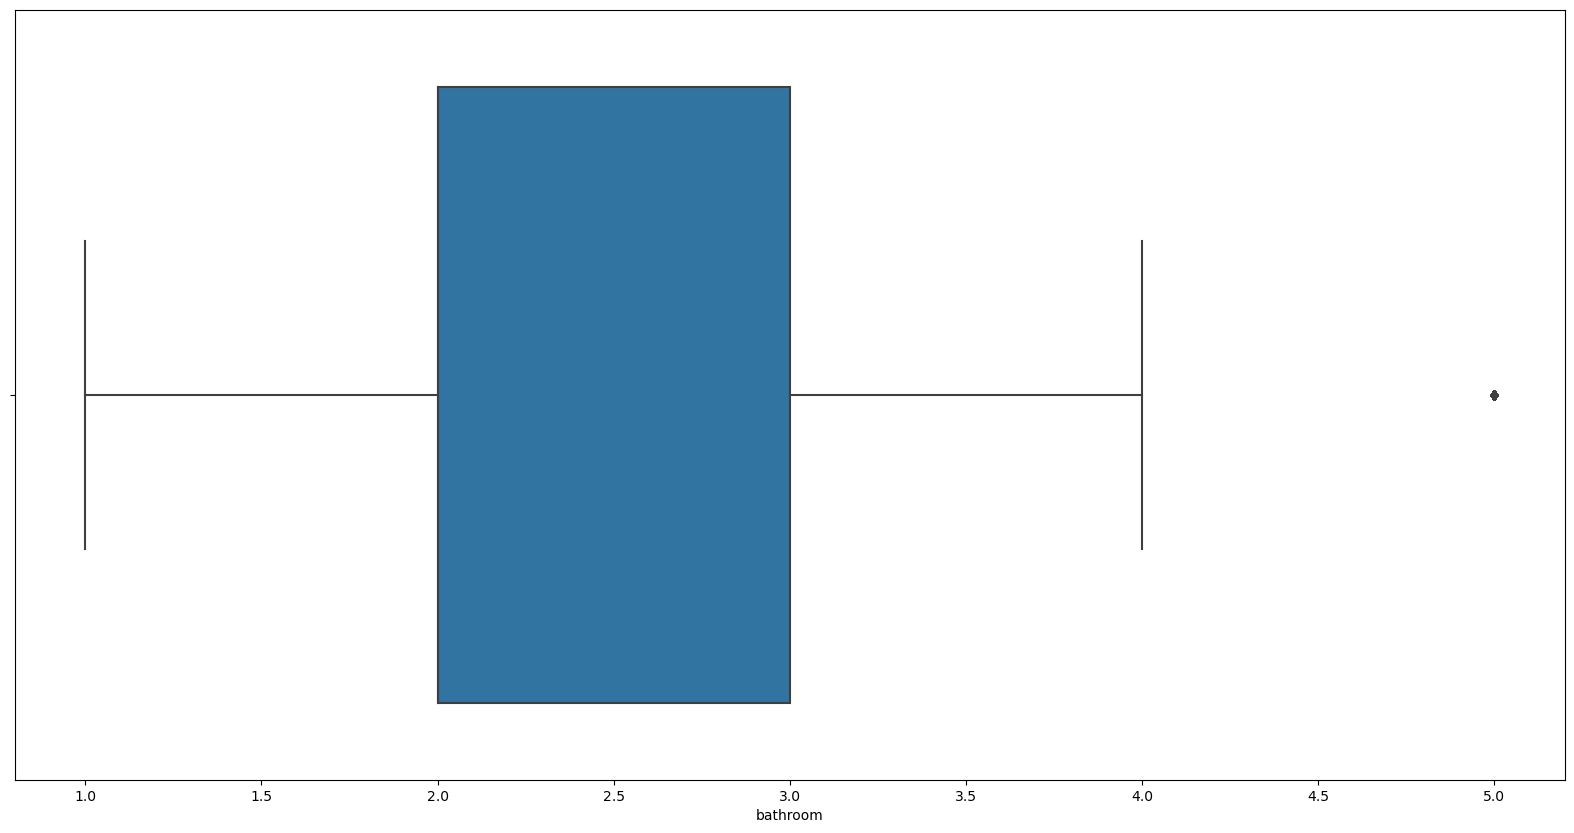

In [41]:
sns.boxplot(x='bathroom', data=Data_frame)
plt.show()

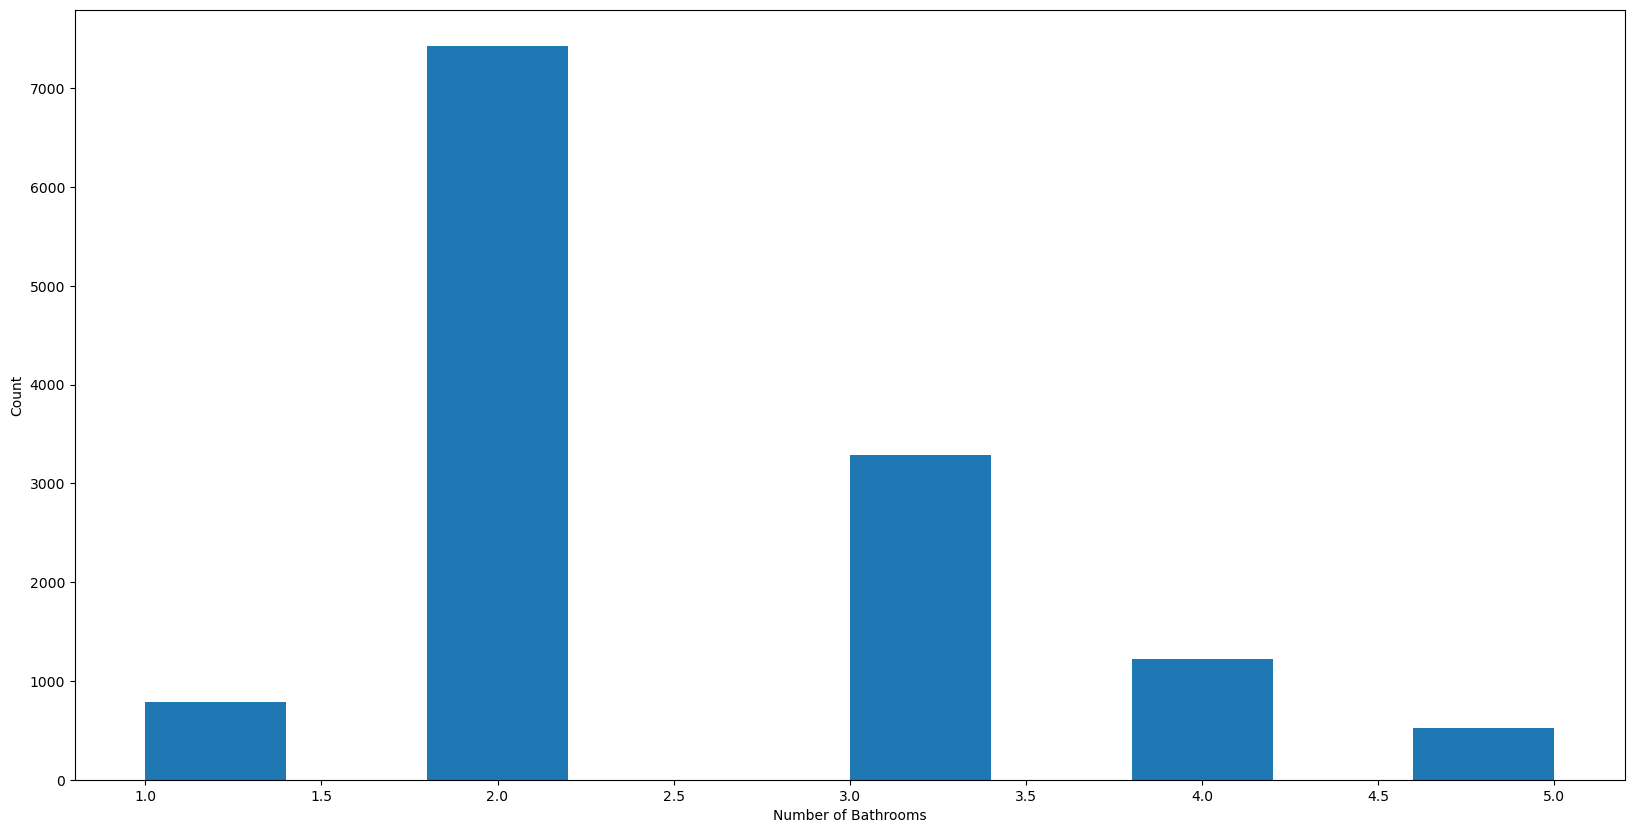

In [42]:
plt.hist(Data_frame['bathroom'])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [43]:
Data_frame['bathroom'].describe()

count    13246.000000
mean         2.492300
std          0.889633
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: bathroom, dtype: float64

#### price

In [44]:
Data_frame['price'].describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

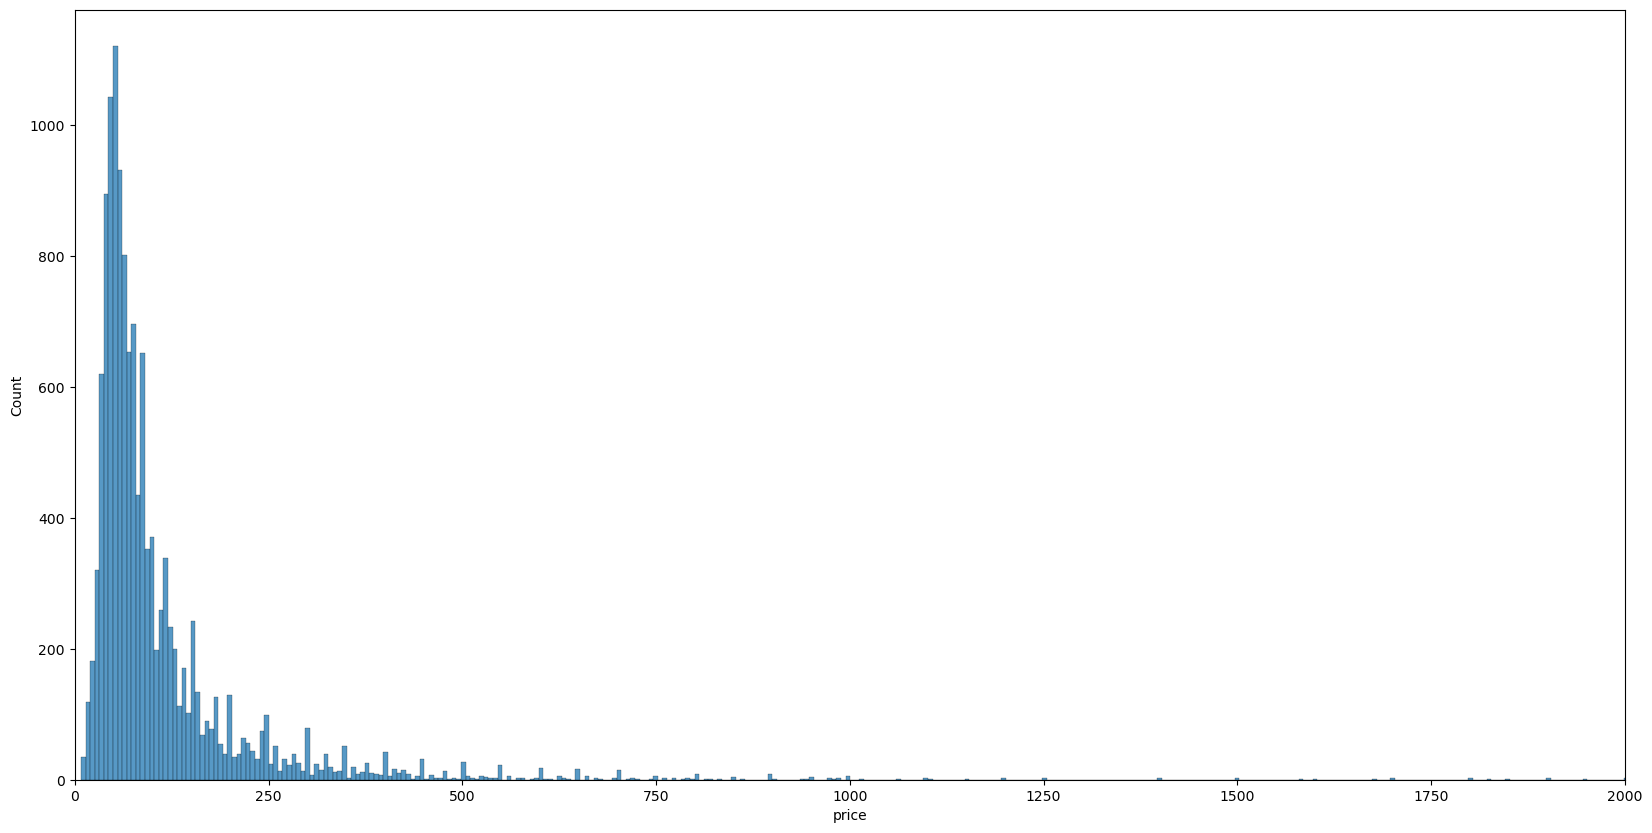

In [45]:
# price -> Treating outliers using Flooring and Capping
sns.histplot(x='price', data=Data_frame)
plt.xlim([0, 2000])
plt.show()

In [46]:
# Applying Quantile Based Flooring and capping
lower_bound = Data_frame['price'].quantile(0.10)
upper_bound = Data_frame['price'].quantile(0.90)
Data_frame['price'] = np.where(Data_frame['price'] < lower_bound, lower_bound, Data_frame['price'])
Data_frame['price'] = np.where(Data_frame['price'] > upper_bound, upper_bound, Data_frame['price'])

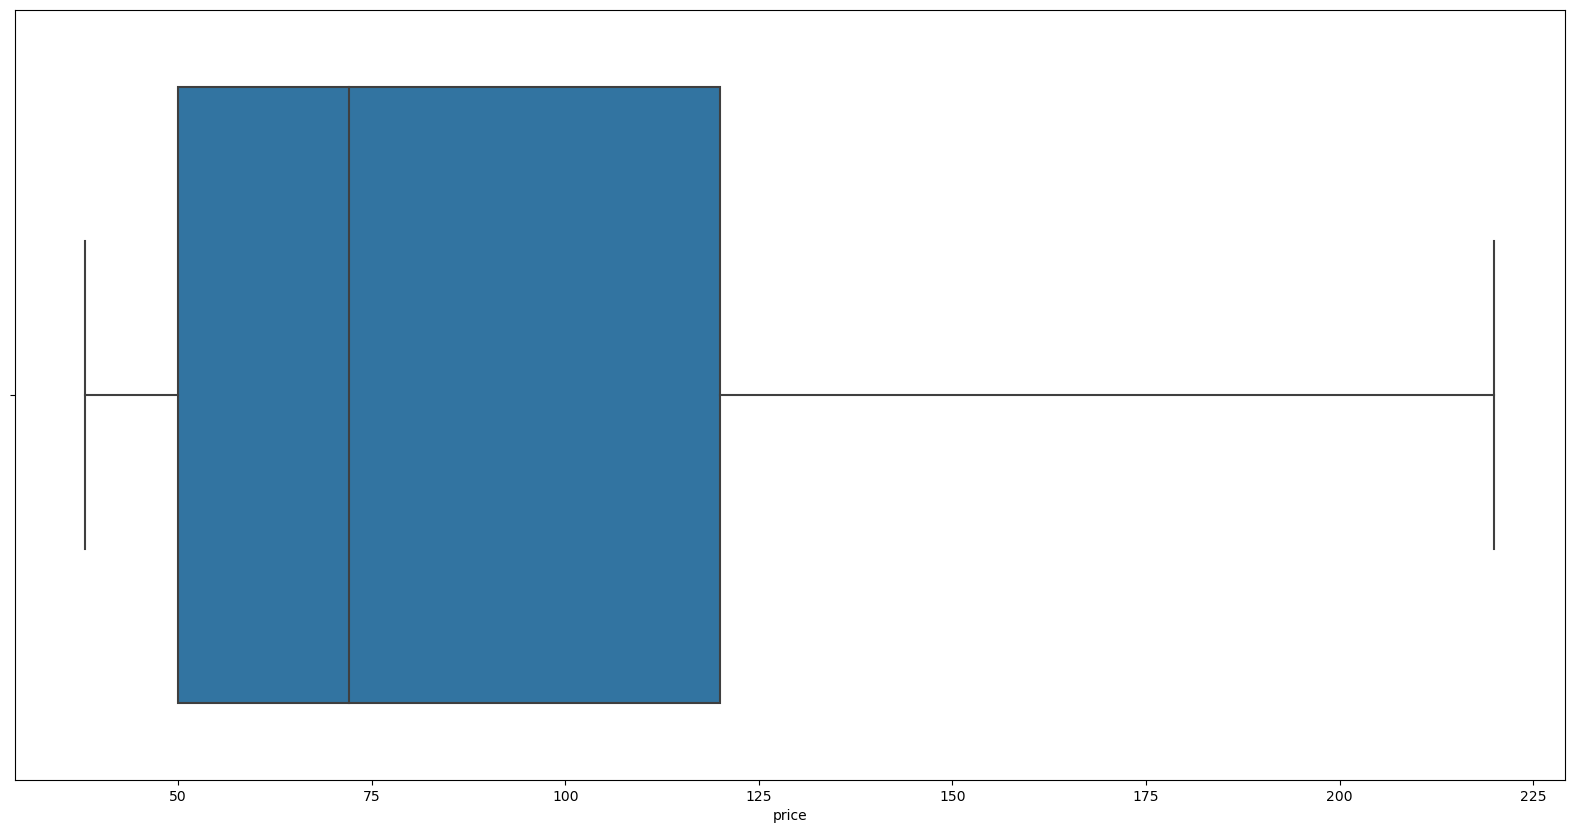

In [47]:
sns.boxplot(x='price', data=Data_frame)
plt.show()

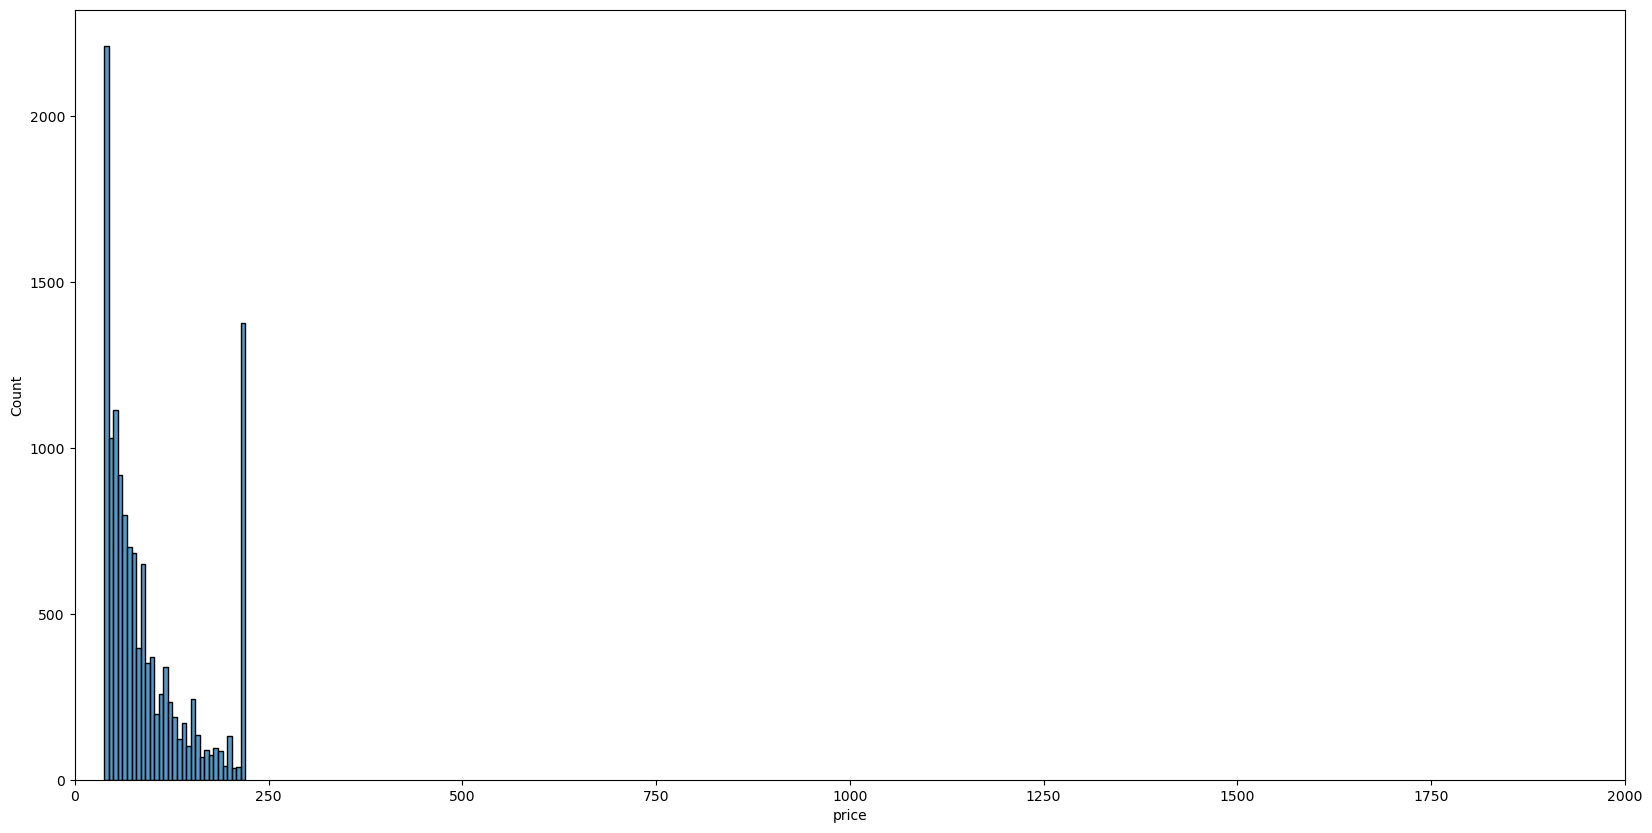

In [48]:
sns.histplot(x='price', data=Data_frame)
plt.xlim([0, 2000])
plt.show()

In [49]:
Data_frame['price'].describe()

count    13246.000000
mean        93.541210
std         57.585644
min         38.000000
25%         50.000000
50%         72.000000
75%        120.000000
max        220.000000
Name: price, dtype: float64

#### BHK

In [50]:
Data_frame['BHK'].describe()

count    13246.000000
mean         2.801902
std          1.295758
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: BHK, dtype: float64

##### 43 bedrooms for a house/real estate property is a lot for any general case, again tells us about the presence of outliers

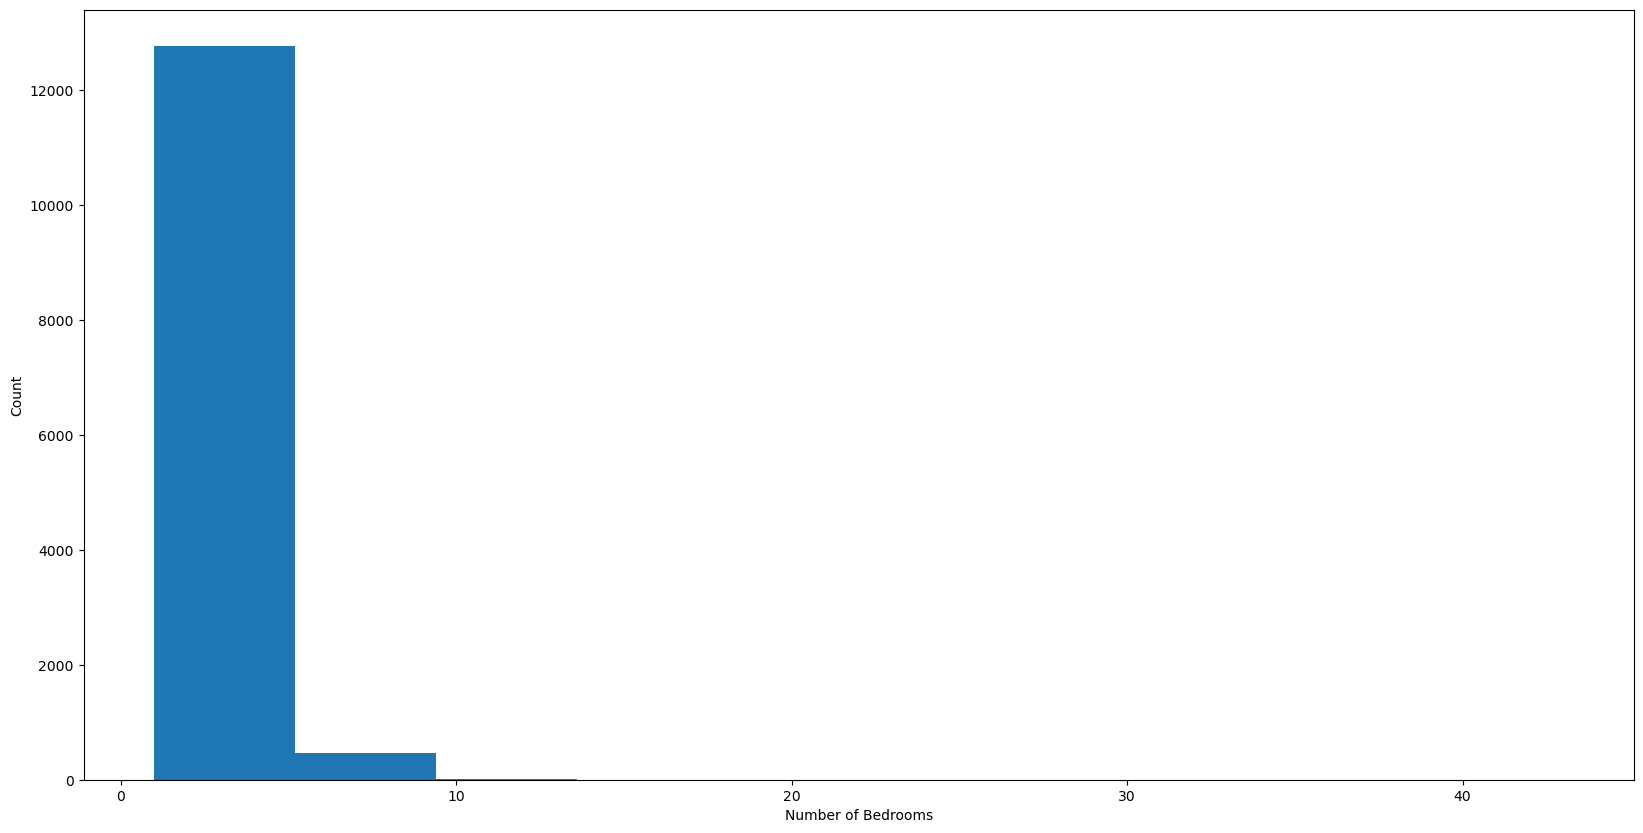

In [51]:
plt.hist(Data_frame['BHK'])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

In [52]:
# BHK - small quanitites of Outliers so Replace them with median 
median = Data_frame['BHK'].quantile(0.50)
upper_out = Data_frame['BHK'].quantile(0.98)
Data_frame['BHK'] = np.where(Data_frame['BHK'] > upper_out, median, Data_frame['BHK'])

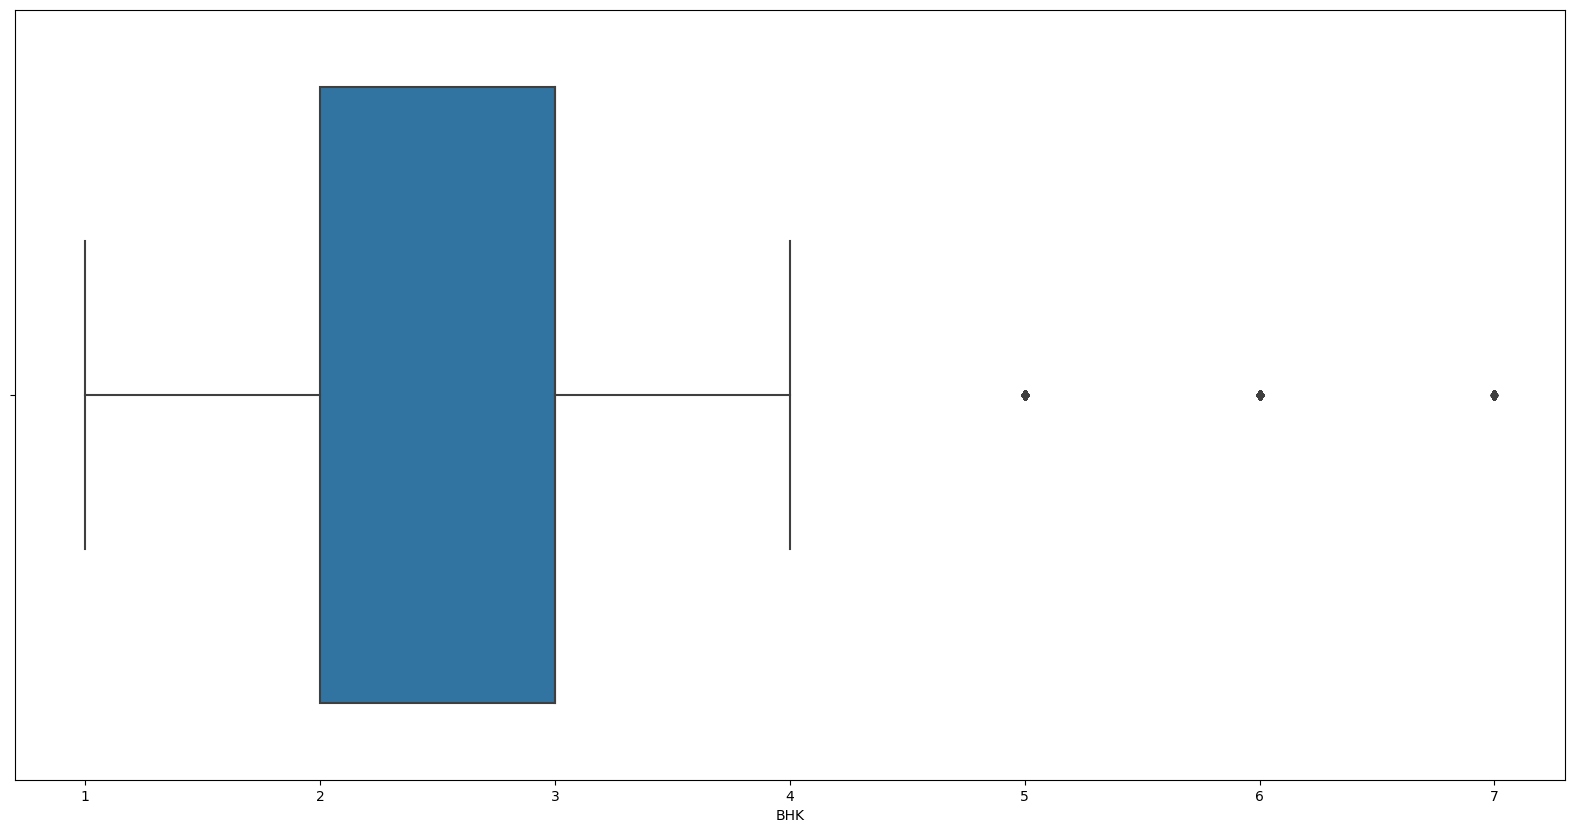

In [53]:
sns.boxplot(x='BHK', data=Data_frame)
plt.show()

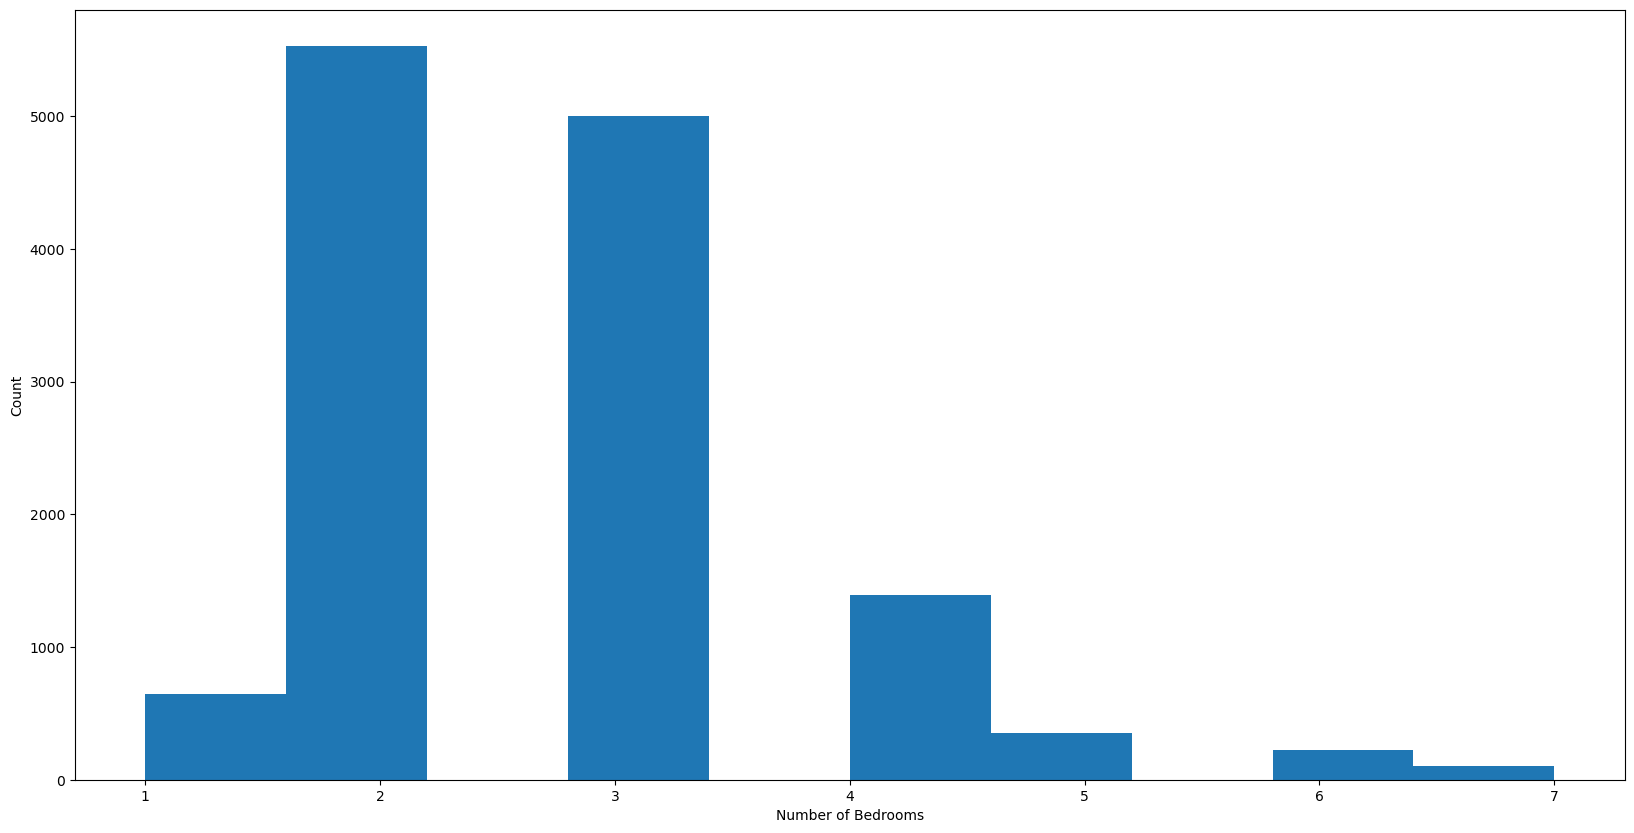

In [54]:
plt.hist(Data_frame['BHK'])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

In [55]:
Data_frame['BHK'].describe()

count    13246.000000
mean         2.723615
std          1.009848
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: BHK, dtype: float64

In [56]:
Data_frame.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2408.5,5.0,3.000000,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,51.00,2.0,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,38.00,2.0,3247.863248
6,Super built-up Area,Old Airport Road,2408.5,4.0,1.584343,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1.584343,220.00,4.0,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.000000,63.25,3.0,4828.244275
9,Plot Area,Other,1020.0,2.0,1.584343,220.00,6.0,36274.509804


#### Type2
##### In a General Real Esate Property / House, the number of Bathrooms depends on number of Bedrooms [BHK]. The equations in general is 
##### total Bathroom <= BHK + 1 [1 - extra for Guest]
##### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [57]:
Data_frame[~(Data_frame['bathroom'] < (Data_frame['BHK'] + 2))].shape

(44, 8)

In [58]:
Data_frame[(Data_frame['bathroom'] < (Data_frame['BHK'] + 2))].shape

(13202, 8)

In [59]:
Data_frame.shape

(13246, 8)

In [60]:
Data_frame = Data_frame[(Data_frame['bathroom'] < (Data_frame['BHK'] + 2))]
Data_frame.shape

(13202, 8)

In [61]:
Data_frame['balcony'] = Data_frame['balcony'].astype('int')

In [62]:
Data_frame.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2408.5,5.0,3,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1,38.00,2.0,3247.863248
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1,63.25,3.0,4828.244275
9,Plot Area,Other,1020.0,2.0,1,220.00,6.0,36274.509804


##### price_per_sqft

In [63]:
Data_frame['price_per_sqft'].describe()

count    1.320200e+04
mean     7.905902e+03
std      1.067220e+05
min      2.257421e+00
25%      4.258918e+03
50%      5.420873e+03
75%      7.298737e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

##### Here we find that min price per sqft is 2.25 whereas max is 1.2e+07, this shows a wide variation in property prices.

In [64]:
# Applying Quantile Based Flooring and capping
lower_bound = Data_frame['price_per_sqft'].quantile(0.10)
upper_bound = Data_frame['price_per_sqft'].quantile(0.90)
Data_frame['price_per_sqft'] = np.where(Data_frame['price_per_sqft'] < lower_bound, lower_bound, Data_frame['price_per_sqft'])
Data_frame['price_per_sqft'] = np.where(Data_frame['price_per_sqft'] > upper_bound, upper_bound, Data_frame['price_per_sqft'])

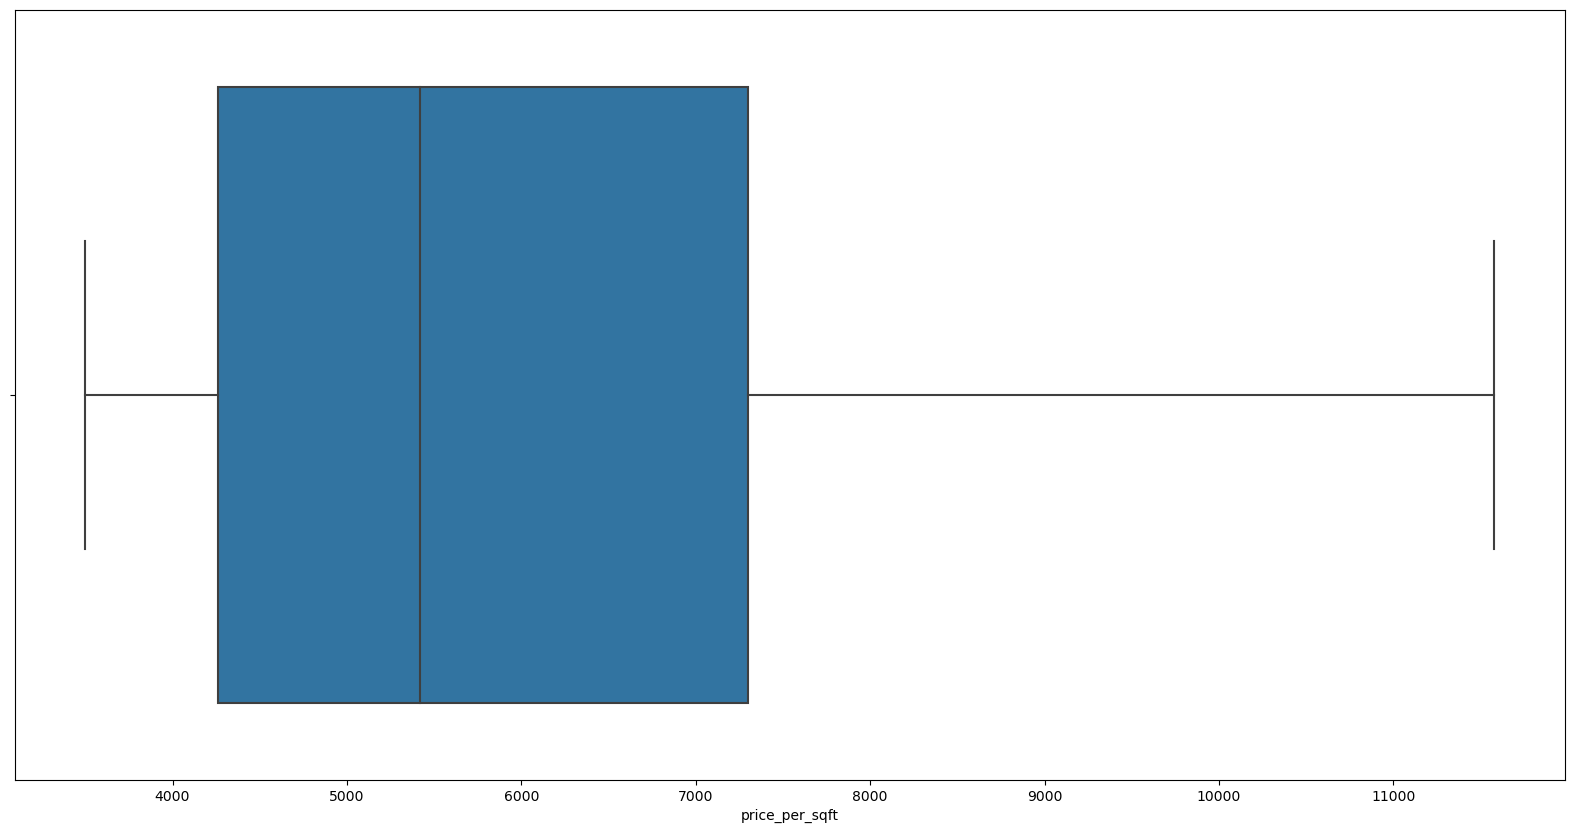

In [65]:
sns.boxplot(x='price_per_sqft', data=Data_frame)
plt.show()

In [66]:
Data_frame['price_per_sqft'].describe()

count    13202.000000
mean      6185.921815
std       2504.903605
min       3500.000000
25%       4258.918009
50%       5420.872534
75%       7298.737435
max      11578.857091
Name: price_per_sqft, dtype: float64

#### Type2
##### Problem here is that in some cases - price of 2bhk is more than price of 3bhk for similar sqft area and same location 
##### and hence is a unexpected error or outlier 

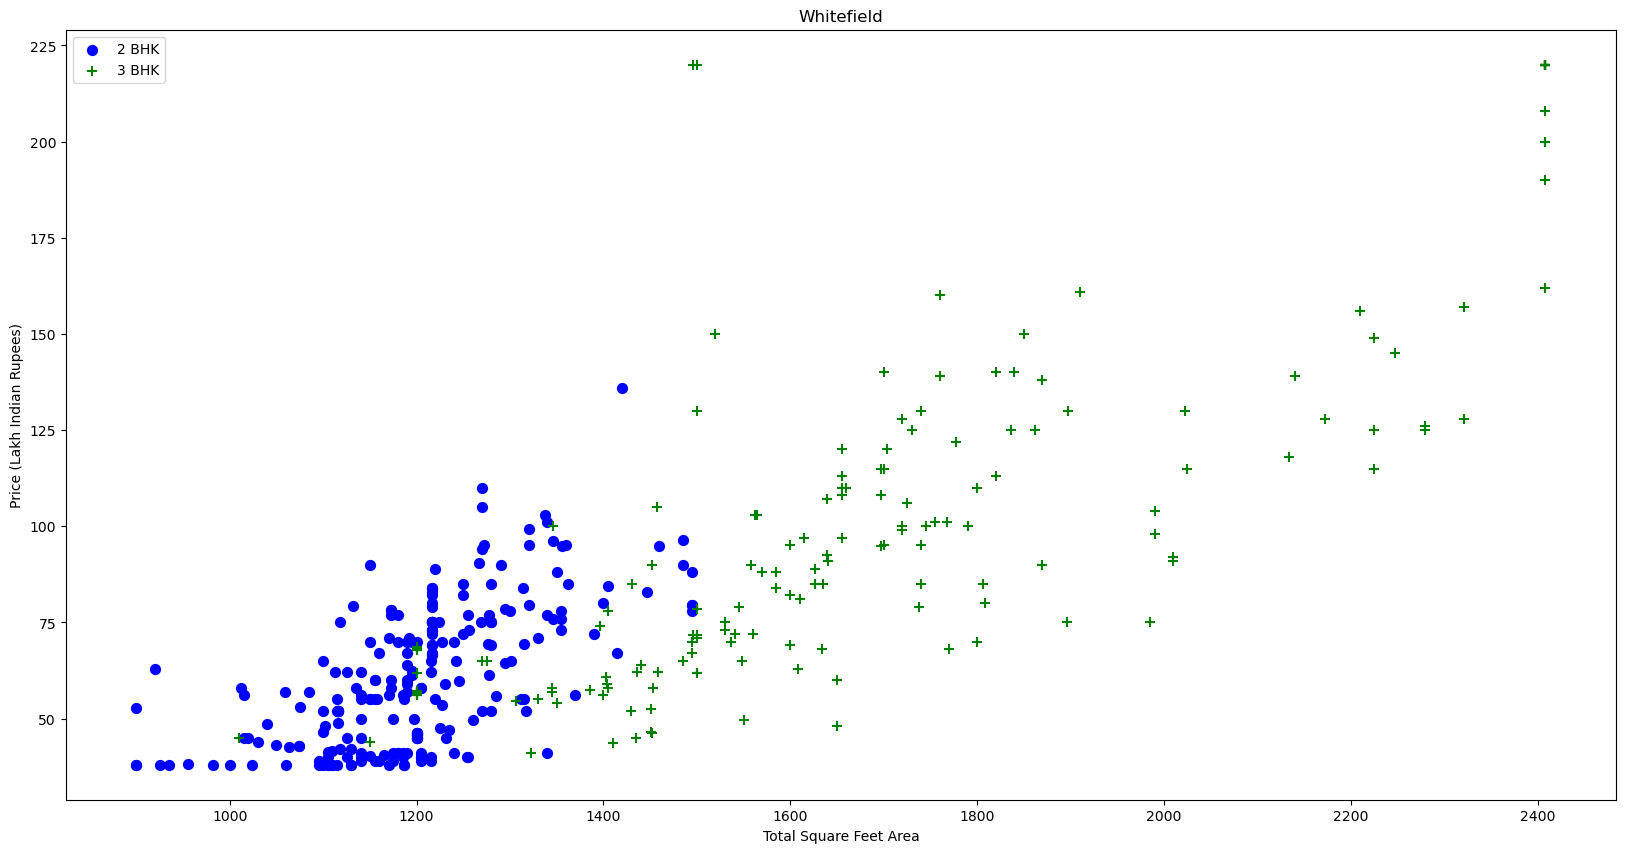

In [67]:
# Checking by plotting scatter plot of different locations

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(Data_frame,"Whitefield")

##### Here Prices of 2bhk are more than 3bhk for similar or same total_sqft area, it means price_per_sqft of 2bhk should be more than 3bhk for the same location and similar total_sqft area 
##### So now we can remove those 3BHK whose price_per_sqft is less than mean price_per_sqft of 2 BHK 

##### We here are dealing with same location [ because Different Location will affect the price ]

In [68]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)
Data_frame = remove_bhk_outliers(Data_frame)
Data_frame.shape

(9087, 8)

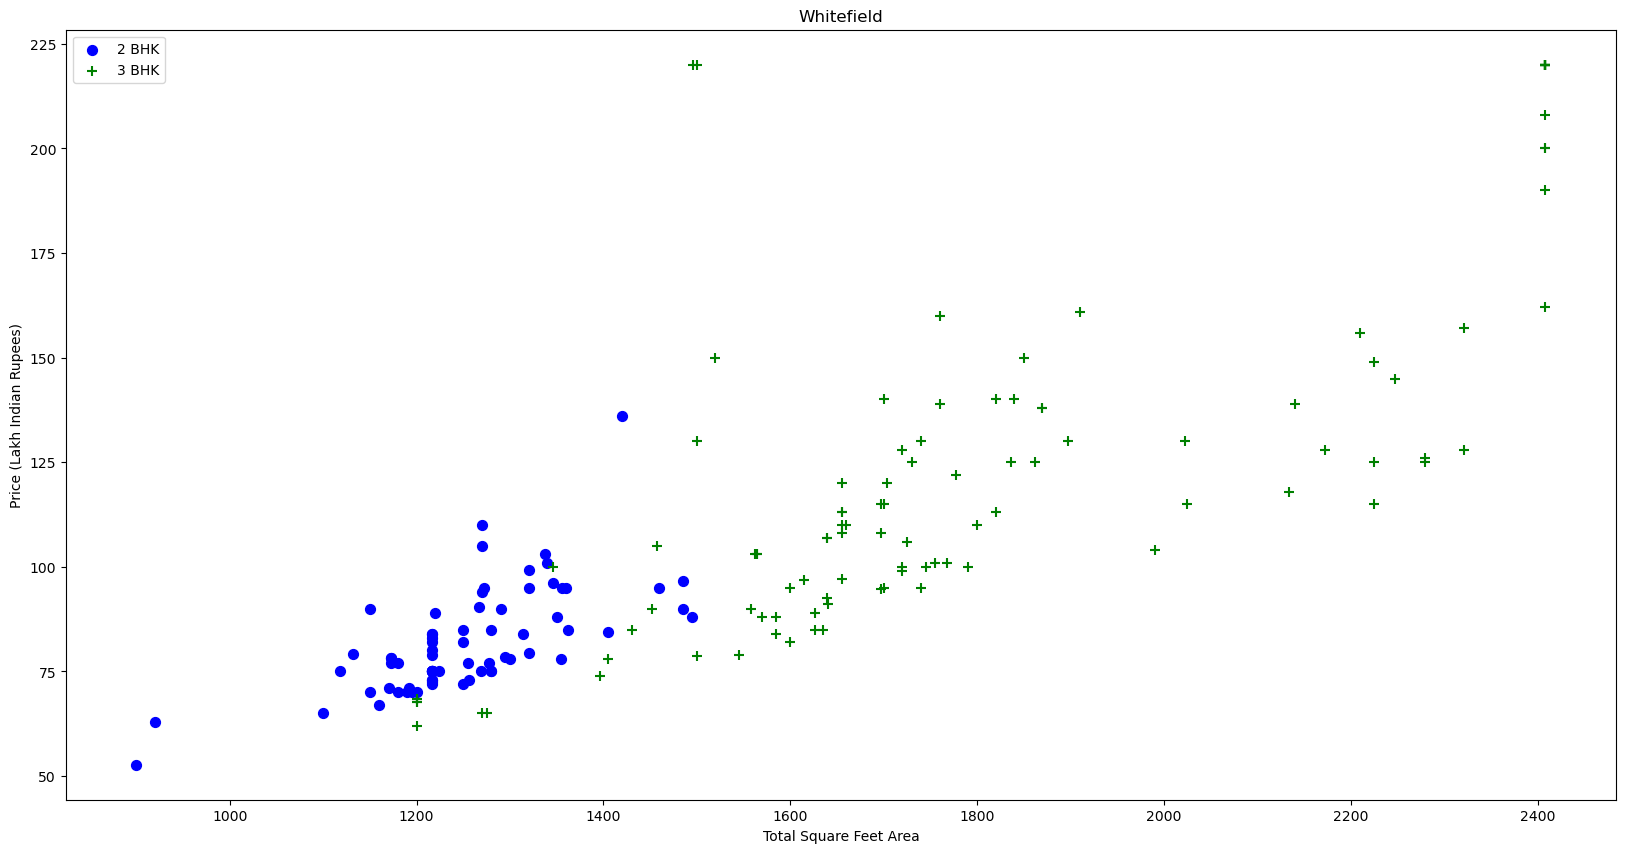

In [69]:
plot_scatter_chart(Data_frame,"Whitefield")

In [70]:
Data_frame.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0,3699.810606
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0,4250.000000
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0,11578.857091
9,Plot Area,Other,1020.0,2.0,1,220.00,6.0,11578.857091
11,Plot Area,Whitefield,2408.5,5.0,3,220.00,4.0,10592.459605
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0,3800.000000
13,Built-up Area,Gottigere,1100.0,2.0,2,40.00,2.0,3636.363636


In [71]:
Data_frame.drop(['price_per_sqft'], axis=1, inplace=True)

In [72]:
Data_frame.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0
9,Plot Area,Other,1020.0,2.0,1,220.00,6.0
11,Plot Area,Whitefield,2408.5,5.0,3,220.00,4.0
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0
13,Built-up Area,Gottigere,1100.0,2.0,2,40.00,2.0


#### Type2
#### In general Square ft per Bedroom is 300 
#### anything less than that is suspicious and can be declared as outlier

In [73]:
#Check
Data_frame[Data_frame.total_sqft/Data_frame.BHK<300].head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK
9,Plot Area,Other,1020.0,2.0,1,220.0,6.0
58,Plot Area,Other,1407.0,4.0,1,150.0,6.0
89,Plot Area,Rajaji Nagar,900.0,2.0,3,160.0,6.0
129,Plot Area,Other,950.0,2.0,0,115.0,7.0
149,Plot Area,Other,1034.0,5.0,1,185.0,6.0
176,Plot Area,Kumaraswami Layout,900.0,3.0,2,85.0,5.0
193,Plot Area,Other,1800.0,2.0,1,220.0,7.0
258,Plot Area,Other,1200.0,5.0,1,170.0,5.0
282,Plot Area,Other,1450.0,2.0,0,220.0,6.0
315,Plot Area,Other,1200.0,5.0,2,180.0,5.0


In [74]:
Data_frame=Data_frame[~(Data_frame.total_sqft/Data_frame.BHK<300)]
Data_frame.shape

(8649, 7)

In [75]:
Data_frame.head(20)

,area_type,location,total_sqft,bathroom,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0
11,Plot Area,Whitefield,2408.5,5.0,3,220.00,4.0
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0
13,Built-up Area,Gottigere,1100.0,2.0,2,40.00,2.0
14,Plot Area,Sarjapur,2250.0,3.0,2,148.00,3.0


## <font color = 'blue'> Lets Correlate </font>
#### Finding Correlation between Independent and dependent Variables / features 

In [76]:
num_corr = Data_frame[['total_sqft', 'bathroom', 'balcony', 'BHK']].corr()
num_corr

,total_sqft,bathroom,balcony,BHK
total_sqft,1.000000,0.695905,0.258966,0.737733
bathroom,0.695905,1.000000,0.276863,0.756970
balcony,0.258966,0.276863,1.000000,0.245377
BHK,0.737733,0.756970,0.245377,1.000000


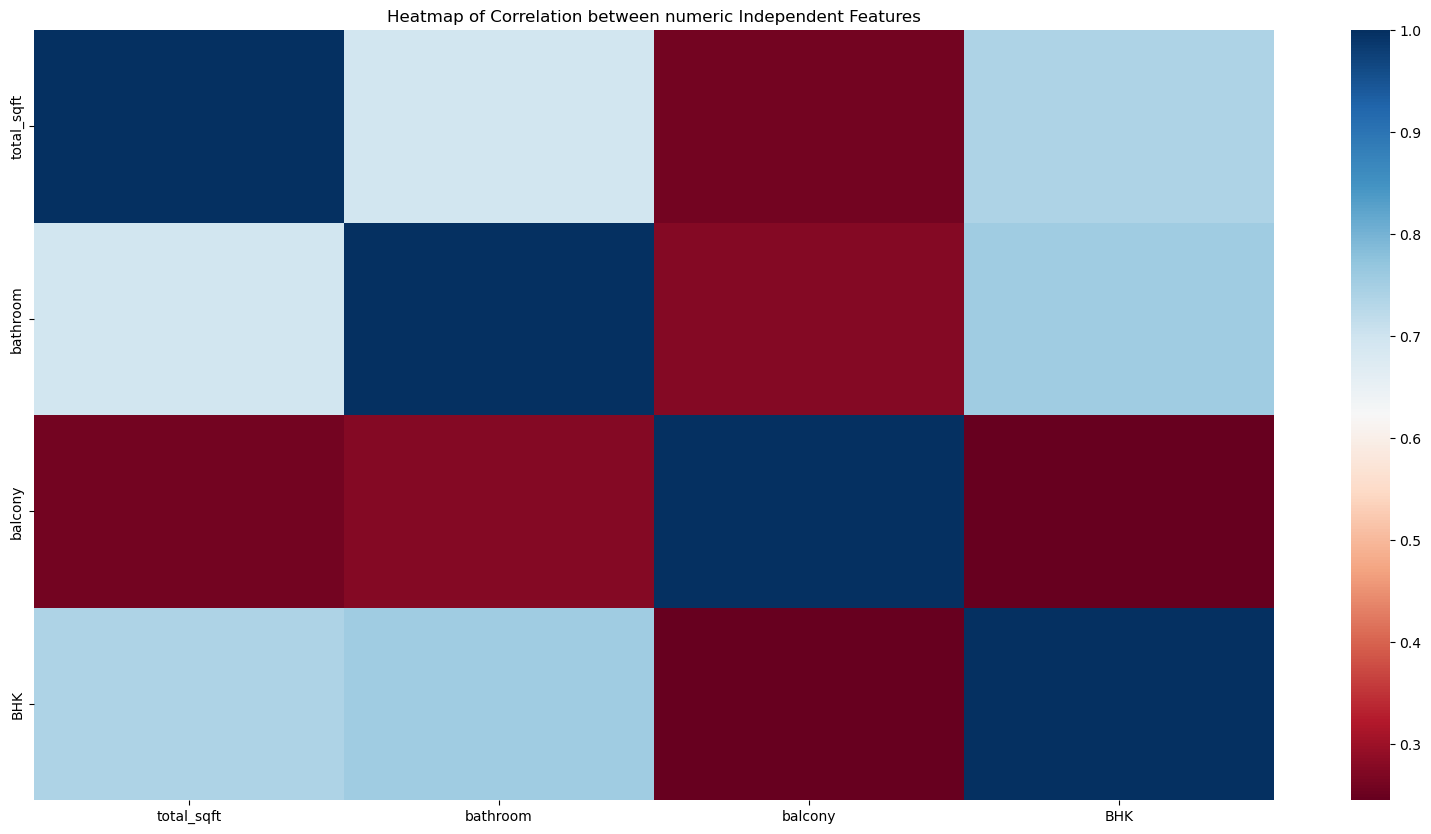

In [77]:
sns.heatmap(num_corr, cmap='RdBu')
plt.title("Heatmap of Correlation between numeric Independent Features")
plt.show()

#### Lets Find Correlation between each Independent feature and Dependent feature [aka - Target]

In [78]:
corr_tot_pr = Data_frame[['total_sqft', 'price']].corr()
corr_tot_pr

,total_sqft,price
total_sqft,1.000000,0.828504
price,0.828504,1.000000


In [79]:
pearson_tot_pr = stats.pearsonr(Data_frame['total_sqft'], Data_frame['price'])
pearson_tot_pr

PearsonRResult(statistic=0.8285039606691403, pvalue=0.0)

In [80]:
corr_bath_pr = Data_frame[['bathroom', 'price']].corr()
corr_bath_pr

,bathroom,price
bathroom,1.000000,0.677045
price,0.677045,1.000000


In [81]:
pearson_bath_pr = stats.pearsonr(Data_frame['bathroom'], Data_frame['price'])
pearson_bath_pr

PearsonRResult(statistic=0.6770449958631659, pvalue=0.0)

In [82]:
corr_bal_pr = Data_frame[['balcony', 'price']].corr()
corr_bal_pr

,balcony,price
balcony,1.000000,0.185434
price,0.185434,1.000000


In [83]:
pearson_bal_pr = stats.pearsonr(Data_frame['balcony'], Data_frame['price'])
pearson_bal_pr

PearsonRResult(statistic=0.18543413063519262, pvalue=9.171223181668094e-68)

In [84]:
corr_bhk_pr = Data_frame[['BHK', 'price']].corr()
corr_bhk_pr

,BHK,price
BHK,1.000000,0.719981
price,0.719981,1.000000


In [85]:
pearson_bhk_pr = stats.pearsonr(Data_frame['BHK'], Data_frame['price'])
pearson_bhk_pr

PearsonRResult(statistic=0.7199808512611187, pvalue=0.0)

#### The P value from pearson correlation is 0 ( < 0.05 ) so our Correlation coef are statically significant 
#### balcony the weakest while total_sqft the strongest 
#### Correlation is not equal to causation -> Balcony might be weakest but is an important feature in deciding the price of a Property

#### Lets Understand the Categorical Features 
#### Lets Find average price of category from categorical features 

In [86]:
df1 = Data_frame[['area_type', 'price']]
df_g = df1.groupby(['area_type'], as_index=False).mean().sort_values(ascending=False, by='price')
df_g.rename(columns={'price':'avg-price'}, inplace=True)
df_g.set_index('area_type', inplace=True)
df_g

,avg-price
area_type,
Plot Area,154.021639
Built-up Area,100.700418
Super built-up Area,90.998586
Carpet Area,89.057167


In [87]:
df2 = Data_frame[['location', 'price']]
df_l = df2.groupby(['location'], as_index=False).mean().sort_values(ascending=False, by='price')
df_l.rename(columns={'price':'avg-price'}, inplace=True)
df_l.set_index('location', inplace=True)
df_l.head(10)

,avg-price
location,
2nd Stage Nagarbhavi,198.888889
Rajaji Nagar,193.955862
Frazer Town,179.233333
Iblur Village,176.428571
Indira Nagar,174.342857
Cooke Town,171.500000
Malleshwaram,168.213208
Old Airport Road,165.020312
Koramangala,162.037963


In [88]:
df3 = Data_frame[['area_type','location', 'price']]
df_p = df3.groupby(['area_type','location'], as_index=False).mean().sort_values(ascending=False, by='price')
df_p.set_index('area_type', inplace=True)
df_p.rename(columns={'price':'avg-price'}, inplace=True)
df_pivot = pd.pivot_table(df_p, index='area_type', columns='location', values='avg-price')
df_pivot.fillna(0, inplace=True)
df_pivot 

location,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
area_type,,,,,,,,,,,,,,,,,,,,,
Built-up Area,100.600000,170.0,65.766667,81.0,105.758571,110.600000,84.375000,99.666667,73.216667,140.000,...,51.833478,56.000000,56.000000,119.800000,0.000000,151.283333,128.333333,101.952857,51.555556,112.400000
Carpet Area,0.000000,0.0,0.000000,0.0,0.000000,38.000000,0.000000,0.000000,0.000000,0.000,...,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000
Plot Area,210.000000,202.5,206.250000,135.0,172.500000,178.750000,113.400000,120.000000,161.666667,0.000,...,184.666667,115.141250,127.875000,185.285714,0.000000,193.332500,160.000000,130.750000,180.000000,141.666667
Super built-up Area,136.708333,0.0,69.250000,108.5,91.359468,58.483833,57.742222,39.869333,86.770000,86.991,...,54.450297,63.521702,52.423077,87.393913,68.425714,108.226096,74.400000,85.880655,42.538462,91.561970


In [89]:
Data_frame.columns

Index(['area_type', 'location', 'total_sqft', 'bathroom', 'balcony', 'price',
       'BHK'],
      dtype='object')

Text(0, 0.5, 'bathroom')

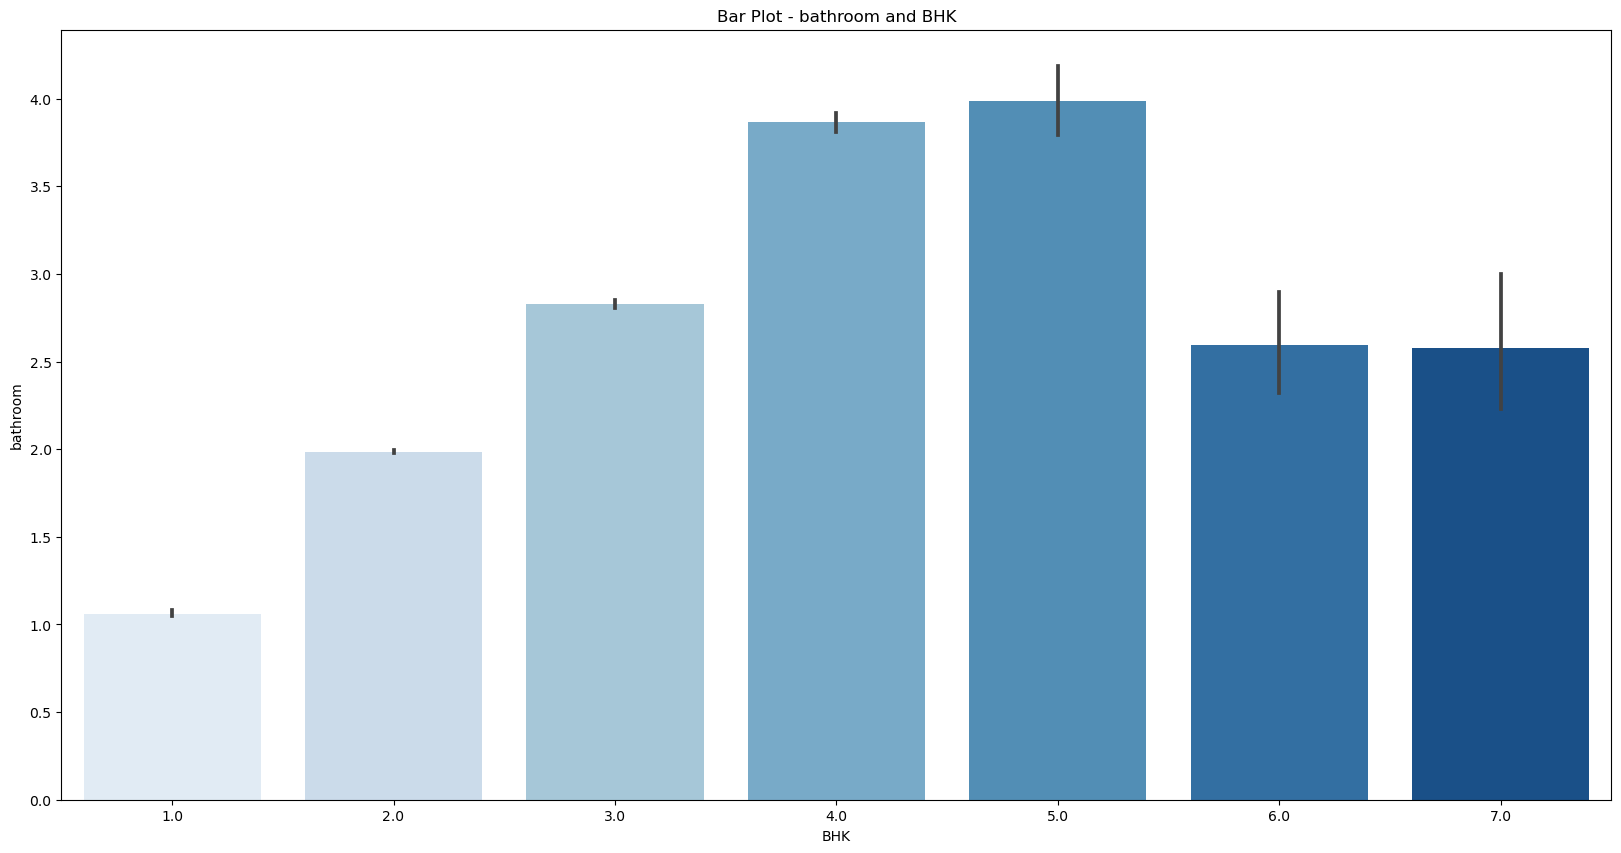

In [90]:
# Bathroom and BHK
sns.barplot(x='BHK', y='bathroom', data=Data_frame, palette='Blues')
plt.title('Bar Plot - bathroom and BHK')
plt.xlabel('BHK')
plt.ylabel('bathroom') 

In [91]:
Data_frame.balcony

0        1
2        3
3        1
4        1
6        1
        ..
13314    3
13316    1
13317    1
13318    1
13319    1
Name: balcony, Length: 8649, dtype: int32

Text(0, 0.5, 'balcony')

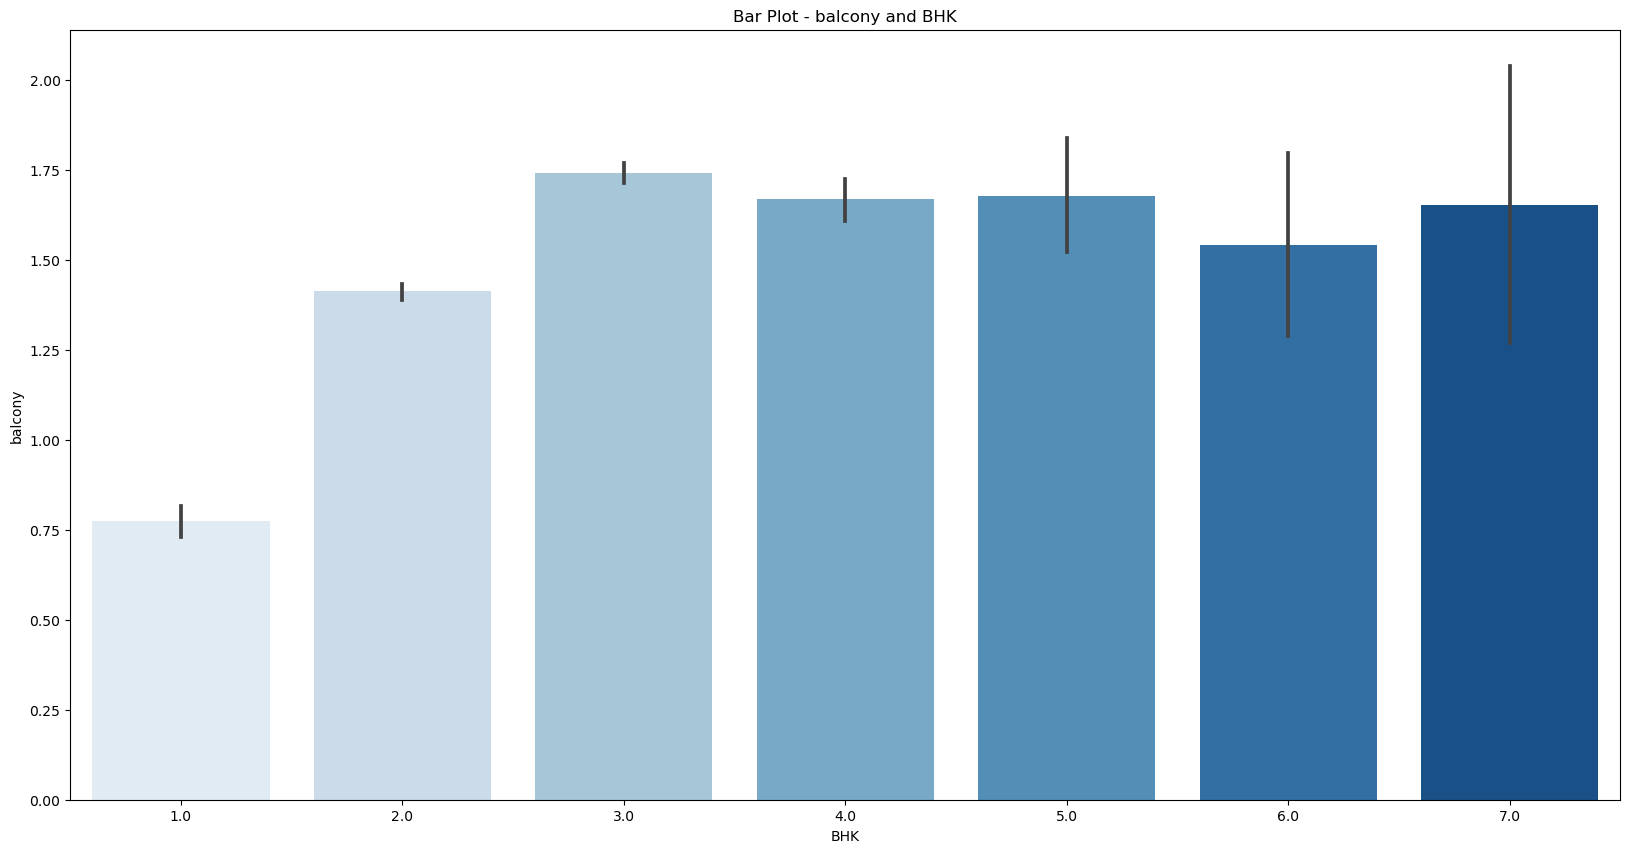

In [92]:
# Balconies and BHK
sns.barplot(x='BHK', y='balcony', data=Data_frame, palette='Blues')
plt.title('Bar Plot - balcony and BHK')
plt.xlabel('BHK')
plt.ylabel('balcony') 

In [93]:
Data_frame.to_csv("Cleaned_data.csv")

## <font color = 'green'> Model Building - ENCODING </font>
#### Encoding the Categoricals features - area_type and location

In [94]:
one_dum = pd.get_dummies(Data_frame['area_type'])
Data_frame = pd.concat([Data_frame, one_dum], axis=1)
Data_frame.drop(['area_type'], axis=1, inplace=True)

In [95]:
Data_frame.head(10)

,location,total_sqft,bathroom,balcony,price,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,1056.0,2.0,1,39.07,2.0,False,False,False,True
2,Uttarahalli,1440.0,2.0,3,62.00,3.0,True,False,False,False
3,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0,False,False,False,True
4,Kothanur,1200.0,2.0,1,51.00,2.0,False,False,False,True
6,Old Airport Road,2408.5,4.0,1,204.00,4.0,False,False,False,True
7,Rajaji Nagar,2408.5,4.0,1,220.00,4.0,False,False,False,True
11,Whitefield,2408.5,5.0,3,220.00,4.0,False,False,True,False
12,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0,False,False,False,True
13,Gottigere,1100.0,2.0,2,40.00,2.0,True,False,False,False
14,Sarjapur,2250.0,3.0,2,148.00,3.0,False,False,True,False


In [96]:
ne_dum = pd.get_dummies(Data_frame['location'])
Data_frame = pd.concat([Data_frame, ne_dum], axis=1)
Data_frame.drop(['location'], axis=1, inplace=True)

In [97]:
Data_frame.head(10)

,total_sqft,bathroom,balcony,price,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,1,39.07,2.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3,62.00,3.0,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1,95.00,3.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1,51.00,2.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,2408.5,4.0,1,204.00,4.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,2408.5,4.0,1,220.00,4.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11,2408.5,5.0,3,220.00,4.0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
12,1000.0,2.0,1,38.00,2.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
13,1100.0,2.0,2,40.00,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,2250.0,3.0,2,148.00,3.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# <font color = 'green'> Model Building - Building a Regression Model </font>
### Spliting using Train-Test Split

In [98]:
Data_frame.shape

(8649, 190)

In [99]:
X = Data_frame.drop(['price'], axis=1)
X.shape

(8649, 189)

In [100]:
Y = Data_frame['price']
Y.shape

(8649,)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.17, random_state=42)
print(f"{X_train.shape} \n {X_test.shape} \n {Y_train.shape} \n {Y_test.shape}")

(7178, 189) 
 (1471, 189) 
 (7178,) 
 (1471,)


## <font color = 'blue'>Multiple Linear Regression</font> 

In [102]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, Y_train)
Y_pred = LinearModel.predict(X_test)
Y_pred

array([ 50.82208252,  73.53894043,  76.25177002, ..., 175.17388916,
        63.9309082 , 123.27496338])

In [103]:
Y_pred_train = LinearModel.predict(X_train)
Y_pred_train

array([ 42.87127686,  64.05889893,  63.49829102, ...,  55.48773193,
       124.421875  , 188.5390625 ])

In [104]:
# mse value - Test
MSE = mse(Y_test, Y_pred)
MSE

677.0920583540756

In [105]:
# mse value - train
MSE_t = mse(Y_train, Y_pred_train)
MSE_t

636.7225755453949

#### <b> R square value - train and test </b>

In [106]:
# R^2 Value - Train
r2_val_t = LinearModel.score(X_train, Y_train)
r2_val_t

0.827279277640179

In [107]:
# R^2 Value - Test
r2_val = LinearModel.score(X_test, Y_test)
r2_val

0.8225443856576248

In [108]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8225443856576248

In [109]:
r2_score(Y_train, Y_pred_train)

0.827279277640179

In [110]:
LinearModel.intercept_

346035611720.28564

In [111]:
for i in range(0, 6):
    print(LinearModel.coef_[i])

0.07695119245304761
5.1498448735378375
-0.3395406077769625
6.540551644714913
-345502903372.2436
-345502903371.63715


#### <b> Dist and Scatter Plot </b>

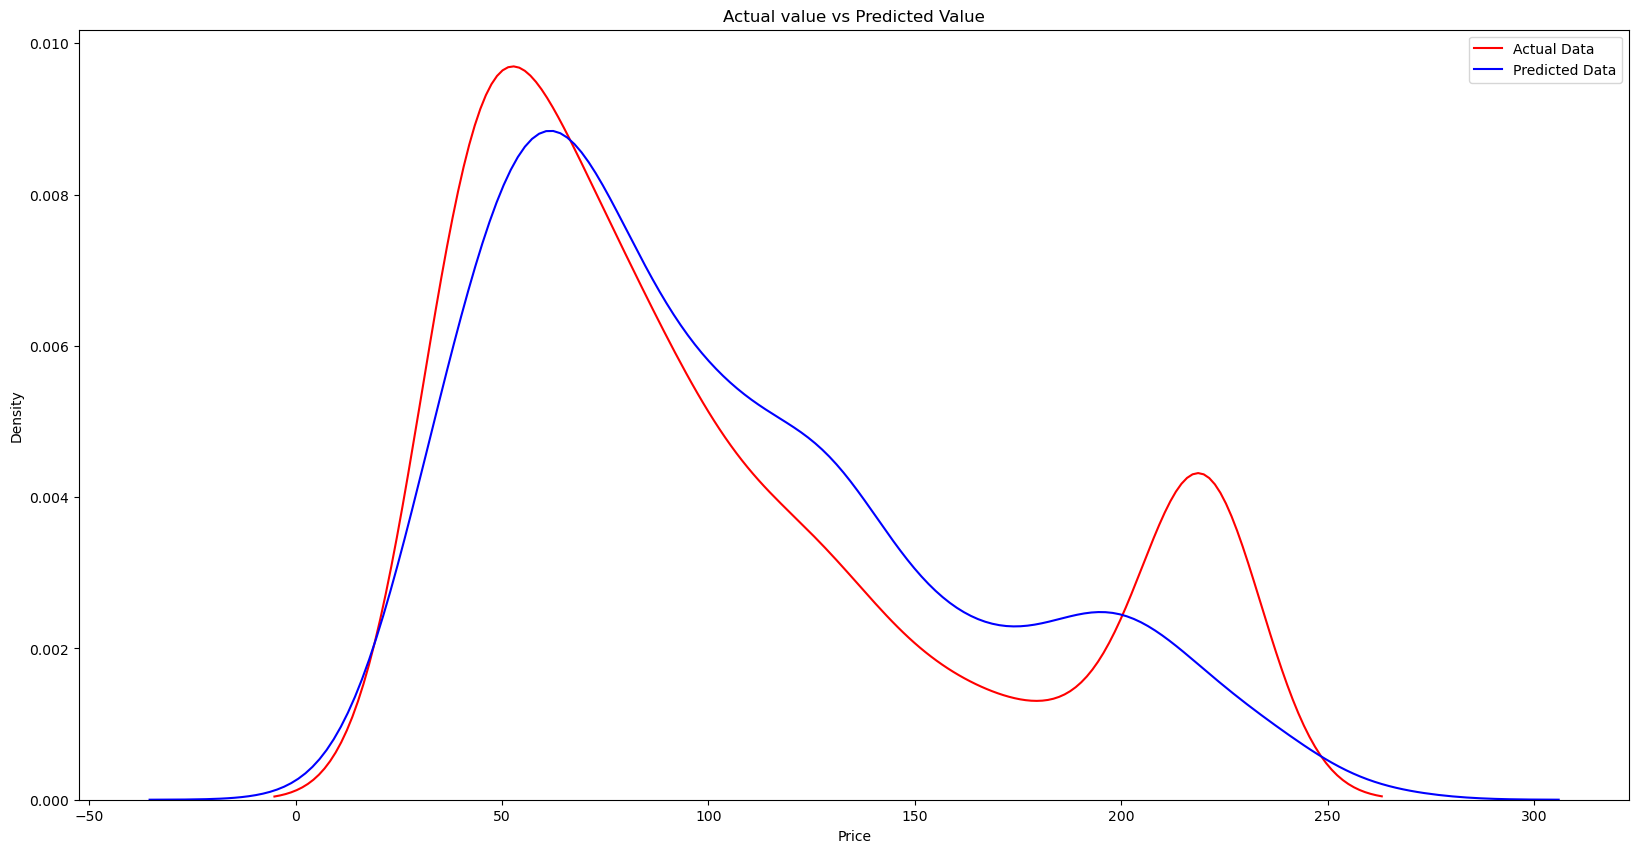

In [112]:
# Dist Plot
axis = sns.distplot(x=Y_test, hist=False, color='red', label='Actual Data')
sns.distplot(x=Y_pred, hist=False, color='blue', label='Predicted Data', ax=axis)
plt.xlabel('Price')
plt.title('Actual value vs Predicted Value')
plt.legend(loc='best')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

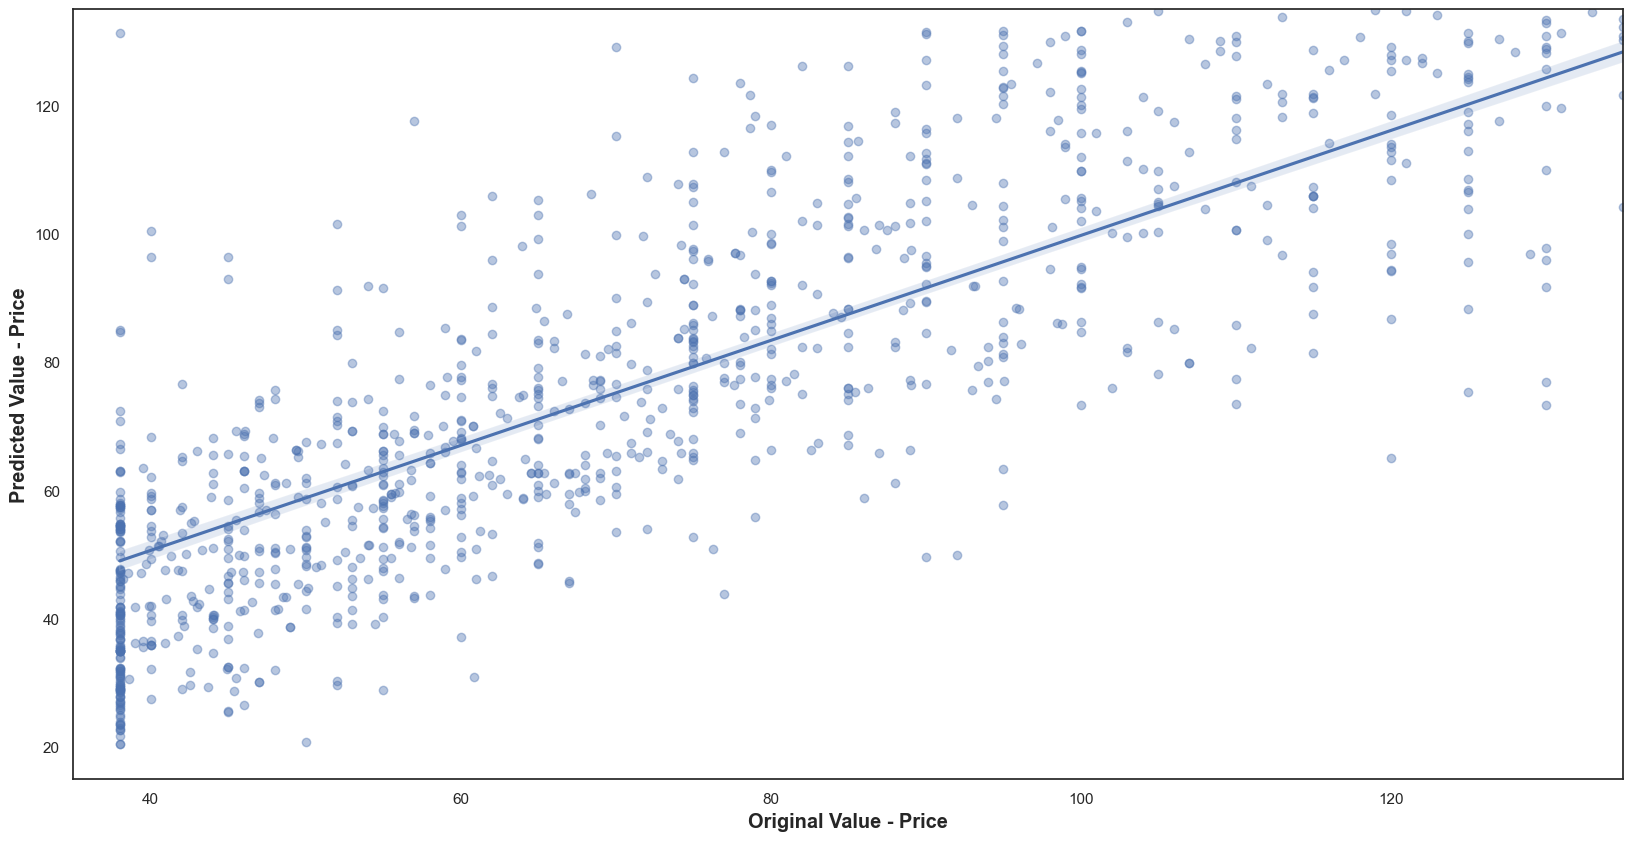

In [113]:
# Scatter Plot
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x= Y_test, y= Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Value - Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Value - Price', fontsize='large', fontweight='bold')
ax.set_xlim(35, 135)
ax.set_ylim(15, 135)
plt.show

#### <font color = 'red'>Using K Fold cross validation score to measure accuracy of our LinearRegression model</font>

In [114]:
cv = KFold(n_splits=8, random_state=None)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.81644405, 0.83416413, 0.82553922, 0.82262638, 0.8044227 ,
       0.81948954, 0.842476  , 0.80033625])

In [115]:
result = cross_val_score(LinearRegression(), X, Y, cv=cv)
print(f"Average Accuracy - {result.mean()}")

Average Accuracy - 0.8206872844796148


## Decision tree for Regression / Prediction ?

In [116]:
Tree_model = DecisionTreeRegressor(max_depth=5)
Tree_model.fit(X_train, Y_train)
Y_hat = Tree_model.predict(X_test)

In [117]:
# R^2 Value
r2_val_t = Tree_model.score(X_test, Y_test)
r2_val_t

0.8004133365466866

In [118]:
cvt = KFold(n_splits=10, random_state=None)
cross_val_score(DecisionTreeRegressor(max_depth=5), X, Y, cv=cvt)

array([0.80489968, 0.79509544, 0.79364274, 0.77423932, 0.78333249,
       0.73676151, 0.77471187, 0.81736563, 0.77536051, 0.76885779])

In [119]:
result_t = cross_val_score(DecisionTreeRegressor(max_depth=6), X, Y, cv=cvt)
print(f"Average Accuracy - {result_t.mean()}")

Average Accuracy - 0.7937242665019321


In [120]:
X.columns

Index(['total_sqft', 'bathroom', 'balcony', 'BHK', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area', 'Super built-up  Area',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       ...
       'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=189)

#### Multiple Linear Regression Model gives better Accuracy than Decision tree

## Random Forest

In [121]:
rf = RandomForestRegressor(n_estimators=105)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [122]:
# R^2 Value
r2_val_rf = rf.score(X_test, Y_test)
r2_val_rf

0.8396431673684237

In [123]:
cvt = KFold(n_splits=8, random_state=None)
cross_val_score(RandomForestRegressor(max_depth=6, n_estimators=105), X, Y, cv=cvt)

array([0.82236625, 0.82518609, 0.80873568, 0.8074732 , 0.79864291,
       0.80299413, 0.82757501, 0.79046541])

In [124]:
result_t = cross_val_score(RandomForestRegressor(max_depth=6, n_estimators=105), X, Y, cv=cvt)
print(f"Average Accuracy - {result_t.mean()}")

Average Accuracy - 0.8110913866515853


## Evaluating


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor  # You can choose your preferred model

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train your chosen model
model = RandomForestRegressor()  # You can choose any other regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance (e.g., using Mean Squared Error)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("Mean Squared Error:", mse)
print("Root Mean Square Error:",rmse)







Mean Squared Error: 613.8233879129799
Root Mean Square Error: 24.775459388535662


In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance (e.g., using Mean Squared Error)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))

print("Mean Squared Error:", mse)

print("Root Mean Square Error:",rmse)





Mean Squared Error: 712.6773625427047
Root Mean Square Error: 26.696017728168833


### <b>Result</b> -  Using Linear Regression as the Base model as it gives a good result and is less time consuming

## <b> Testing Model for Few Properties </b>

In [127]:
def predict_price(area_type, location, sqft, balcony, bathroom, BHK):
    area_index = np.where(X.columns==area_type)[0][0]
    loc_index = np.where(X.columns==location)[0][0]
    
    lis = np.zeros(len(X.columns))
    lis[0] = sqft
    lis[1] = bathroom
    lis[2] = balcony
    lis[3] = BHK
    
    if loc_index >=0 and area_index >=0:
        lis[area_index] = 1
        lis[loc_index] = 1
    
    return round(LinearModel.predict([lis])[0], 2)
    

In [128]:
predict_price('Carpet  Area', 'Whitefield', 1250, 2, 2, 3)

85.31

## Export the Model to a Pickle File 

In [129]:
import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as obj:
    pickle.dump(LinearModel, obj)

## Importing Columns 


In [130]:
import json
columns = {
    'Columns': [col.lower() for col in X.columns]
}
with open("Columns.json", 'w') as f:
    f.write(json.dumps(columns))